# Limpieza

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import geopandas as gpd
import descartes
from shapely.geometry import Point, LineString, MultiPoint, MultiLineString
from geopy import distance
import geopy

Cargando el dataset

In [178]:
df = pd.read_csv('../data/properatti.csv')
pd.options.display.max_columns = None
df.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [180]:
df.shape

(121220, 26)

In [181]:
#backup de la data
data = df.copy()

#### 1. Drop sobre columnas con único valor
- La variable solo tiene un tipo, que es sell y no tiene nulos, no aporta nada a un modelo
- La variable Country solo tiene un valor y no tiene nulos
  

In [182]:
df.loc[:,'operation'].value_counts()
## un solor valor

sell    121220
Name: operation, dtype: int64

In [183]:
df.loc[:,'operation'].isna().mean()
# no hay nulos

0.0

Dropeamos estas columnas

In [184]:
df = df.drop('operation', axis=1)
df = df.drop('Unnamed: 0', axis=1)
df.shape

(121220, 24)

In [185]:
df.loc[:,'country_name'].value_counts()
## un solo valor

Argentina    121220
Name: country_name, dtype: int64

In [186]:
df.loc[:,'country_name'].isna().mean()
# no hay nulos

0.0

In [187]:
df = df.drop('country_name', axis=1)
df.shape

(121220, 23)

#### 2. Eliminando columnas con demsiados valores nulos

In [188]:
df.isna().mean()

property_type                 0.000000
place_name                    0.000190
place_with_parent_names       0.000000
state_name                    0.000000
geonames_id                   0.154405
lat-lon                       0.425260
lat                           0.425260
lon                           0.425260
price                         0.168372
currency                      0.168380
price_aprox_local_currency    0.168372
price_aprox_usd               0.168372
surface_total_in_m2           0.324435
surface_covered_in_m2         0.164222
price_usd_per_m2              0.433947
price_per_m2                  0.276869
floor                         0.934837
rooms                         0.609058
expenses                      0.882346
properati_url                 0.000000
description                   0.000016
title                         0.000000
image_thumbnail               0.025672
dtype: float64

In [189]:
## las variables floor y expenses tienen un porcentaje muy grande de nulos por lo que es mejor dropearlas
## tambien dropeamos image_thumbnail, ya que no observamos que aporte valor
df.drop(columns=['floor','expenses','image_thumbnail'], inplace=True)
df.shape

(121220, 20)

In [190]:
df.isna().mean()

property_type                 0.000000
place_name                    0.000190
place_with_parent_names       0.000000
state_name                    0.000000
geonames_id                   0.154405
lat-lon                       0.425260
lat                           0.425260
lon                           0.425260
price                         0.168372
currency                      0.168380
price_aprox_local_currency    0.168372
price_aprox_usd               0.168372
surface_total_in_m2           0.324435
surface_covered_in_m2         0.164222
price_usd_per_m2              0.433947
price_per_m2                  0.276869
rooms                         0.609058
properati_url                 0.000000
description                   0.000016
title                         0.000000
dtype: float64

In [191]:
# dropeamos lat y lon para quedarnos con la columna lat-lon, 
## ya que observamos que no nos puede servir para imputar algun valor faltante
df.loc[(df['lat-lon'].isna()) & (df['lat'].notna()) & (df['lon'].notna()),: ].index.size

0

In [192]:
df = df.drop('lon', axis=1)
df = df.drop('lat', axis=1)
df.shape

(121220, 18)

#### 3. Usando la columna state_name para reducir la longitud del dataset


In [193]:
df_state_name = df['state_name'].str.lower()
df_state_name.head()
### convertimos la variable en cuestión en una serie, cambiamos a lower

0                 capital federal
1          bs.as. g.b.a. zona sur
2                 capital federal
3                 capital federal
4    buenos aires costa atlántica
Name: state_name, dtype: object

In [194]:
df_state_name.isnull().sum()/df_state_name.shape[0]

0.0

In [195]:
df_state_name_value_counts = pd.DataFrame({'states':df.state_name.value_counts(),'porcentaje':df.state_name.value_counts(normalize=True)})
df_state_name_value_counts['porcentaje_acumulado'] = df_state_name_value_counts['porcentaje'].cumsum(axis = 0, skipna = True)
df_state_name_value_counts

,states,porcentaje,porcentaje_acumulado
Capital Federal,32316,0.266590,0.266590
Bs.As. G.B.A. Zona Norte,25560,0.210856,0.477446
Bs.As. G.B.A. Zona Sur,13952,0.115097,0.592542
Córdoba,12069,0.099563,0.692105
Santa Fe,10172,0.083914,0.776019
Buenos Aires Costa Atlántica,10006,0.082544,0.858563
Bs.As. G.B.A. Zona Oeste,9322,0.076902,0.935464
Buenos Aires Interior,2291,0.018900,0.954364
Río Negro,808,0.006666,0.961030
Neuquén,733,0.006047,0.967076


Tomaremos solo los valores que tengan un porcentaje mayor al 1%

In [196]:
states = df_state_name_value_counts[df_state_name_value_counts.porcentaje > .01].index.values
states

array(['Capital Federal', 'Bs.As. G.B.A. Zona Norte',
       'Bs.As. G.B.A. Zona Sur', 'Córdoba', 'Santa Fe',
       'Buenos Aires Costa Atlántica', 'Bs.As. G.B.A. Zona Oeste',
       'Buenos Aires Interior'], dtype=object)

In [197]:
df = df[df['state_name'].isin(states)]

In [198]:
df.state_name.value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Name: state_name, dtype: int64

Vamos a ver el porcentaje de nulos por columna y por estado. 
El porcentaje corresponde al total de nulos de X columna sobre el total de filas en ese estado.
Por ejemplo, el 39,7144% de las propiedades de 'Bs.As. G.B.A. Zona Norte' no poseen información en 'geonames_id'.

In [199]:
df_group_state_null = pd.DataFrame(df.groupby(['state_name'])['property_type'].apply(lambda x: x.isnull().sum())/df.groupby(['state_name'])['property_type'].size())
for i in df.columns[1:]:
    df1 = pd.DataFrame(df.groupby(['state_name'])[i].apply(lambda x: x.isnull().sum())/df.groupby(['state_name'])[i].size())
    df_group_state_null = pd.concat([df_group_state_null, df1], axis = 1)

df_group_state_null

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title
state_name,,,,,,,,,,,,,,,,,,
Bs.As. G.B.A. Zona Norte,0.0,0.0009,0.0,0.0,0.397144,0.552504,0.058764,0.058764,0.058764,0.058764,0.266158,0.069327,0.319053,0.119014,0.728482,0.0,0.000039,0.0
Bs.As. G.B.A. Zona Oeste,0.0,0.0000,0.0,0.0,0.148144,0.397447,0.213366,0.213366,0.213366,0.213366,0.350461,0.148251,0.504076,0.327827,0.486162,0.0,0.000000,0.0
Bs.As. G.B.A. Zona Sur,0.0,0.0000,0.0,0.0,0.317947,0.572176,0.133816,0.133816,0.133816,0.133816,0.490467,0.215883,0.557554,0.289923,0.793291,0.0,0.000000,0.0
Buenos Aires Costa Atlántica,0.0,0.0000,0.0,0.0,0.106836,0.179992,0.094643,0.094643,0.094643,0.094643,0.301919,0.246952,0.365381,0.308015,0.235858,0.0,0.000000,0.0
Buenos Aires Interior,0.0,0.0000,0.0,0.0,0.059799,0.324749,0.208206,0.208206,0.208206,0.208206,0.406373,0.223047,0.558708,0.371017,0.589699,0.0,0.000000,0.0
Capital Federal,0.0,0.0000,0.0,0.0,0.039795,0.264451,0.102055,0.102055,0.102055,0.102055,0.181922,0.072379,0.274848,0.154475,0.525777,0.0,0.000000,0.0
Córdoba,0.0,0.0000,0.0,0.0,0.004226,0.575607,0.251139,0.251222,0.251139,0.251139,0.582070,0.286851,0.695584,0.465076,0.677769,0.0,0.000083,0.0
Santa Fe,0.0,0.0000,0.0,0.0,0.001573,0.470999,0.467853,0.467853,0.467853,0.467853,0.323339,0.274774,0.610696,0.540208,0.677055,0.0,0.000000,0.0


In [200]:
df.shape

(115688, 18)

In [201]:
df.isna().mean()

property_type                 0.000000
place_name                    0.000199
place_with_parent_names       0.000000
state_name                    0.000000
geonames_id                   0.160146
lat-lon                       0.420433
price                         0.154467
currency                      0.154476
price_aprox_local_currency    0.154467
price_aprox_usd               0.154467
surface_total_in_m2           0.320327
surface_covered_in_m2         0.153378
price_usd_per_m2              0.424054
price_per_m2                  0.260831
rooms                         0.604981
properati_url                 0.000000
description                   0.000017
title                         0.000000
dtype: float64

#### 4. Trabajo con place name

In [202]:
df_place_null = df.loc[df['place_name'].isna(), ['place_with_parent_names', 'place_name']]
df_place_null

,place_with_parent_names,place_name
6489,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN
10201,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN
11451,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN
14839,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN
18622,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN
21922,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN
23664,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN
24722,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN
38856,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN
45970,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN


Usamos la columna place_with_parent_names para imputar los valores faltantes de la columna place name

In [203]:
df_place_null['place_name'] = df.apply(lambda x : x['place_with_parent_names'].split('|')[3] \
                                        if pd.isna(x['place_name']) == True else x['place_name'] , axis = 1)


df_place_null

,place_with_parent_names,place_name
6489,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Tigre
10201,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Tigre
11451,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Tigre
14839,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Tigre
18622,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Tigre
21922,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Tigre
23664,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Tigre
24722,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Tigre
38856,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Tigre
45970,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Tigre


In [204]:
df['place_name'] = df.apply(lambda x : x['place_with_parent_names'].split('|')[3] if pd.isna(x['place_name']) == True else x['place_name'] , axis = 1)

In [205]:
df['place_name'].isna().sum()

0

In [206]:
df = df.drop('place_with_parent_names', axis=1)


In [207]:
df.isnull().mean()

property_type                 0.000000
place_name                    0.000000
state_name                    0.000000
geonames_id                   0.160146
lat-lon                       0.420433
price                         0.154467
currency                      0.154476
price_aprox_local_currency    0.154467
price_aprox_usd               0.154467
surface_total_in_m2           0.320327
surface_covered_in_m2         0.153378
price_usd_per_m2              0.424054
price_per_m2                  0.260831
rooms                         0.604981
properati_url                 0.000000
description                   0.000017
title                         0.000000
dtype: float64

#### 5. expresiones regulares

La columna *description* tiene mucha información que se puede extraer. Vamos a tratar de obtener información sobre la cantidad de habitaciones o ambientes de los departamentos

In [208]:
pattern = r'(?P<n_ambientes>\d+)\s*(?:ambientes?|amb|cuartos?|habitaci[oó]n|habitaciones|dormitorios?|dorm|hab)'

In [209]:
resultado = df.description.str.extract(pattern, flags=re.IGNORECASE)

Cambiamos la serie a tipo float para poder incoporarla a rooms y no la castee a Object

In [210]:
s_ambientes = resultado.n_ambientes.astype(float)
s_ambientes

0         2.0
1         NaN
2         2.0
3         3.0
4         1.0
         ... 
121215    2.0
121216    3.0
121217    NaN
121218    2.0
121219    NaN
Name: n_ambientes, Length: 115688, dtype: float64

#### Vemos como está distribuida la extracción

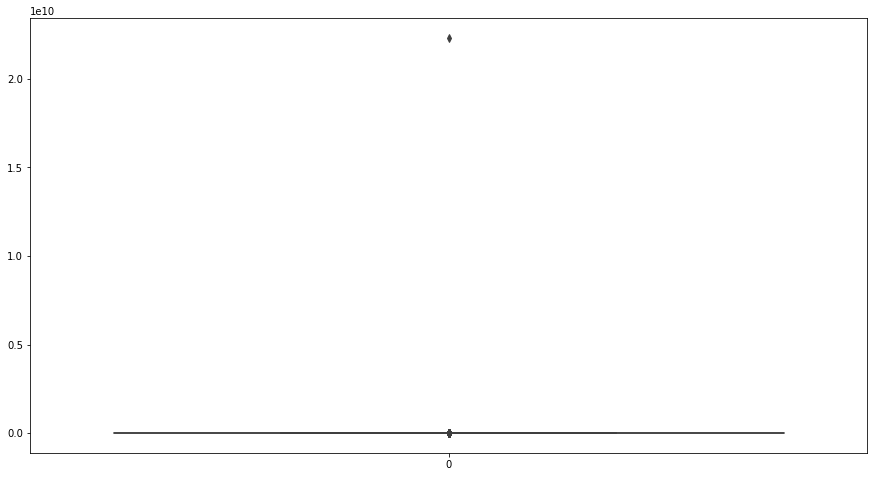

In [211]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=s_ambientes) 
plt.show()

Vemos que hay valores recolectados erroneos por lo extremo. Así que vamos a recortar esos valores seleccionando el ultimo quartil (.99) para rellenar con ese valor

In [212]:
s_ambientes.quantile(.99)

7.0

Asigno el valor a esa parte:

In [213]:
s_ambientes.loc[s_ambientes > s_ambientes.quantile(.99)] = s_ambientes.quantile(.99)

Vemos como queda ahora la distribucion

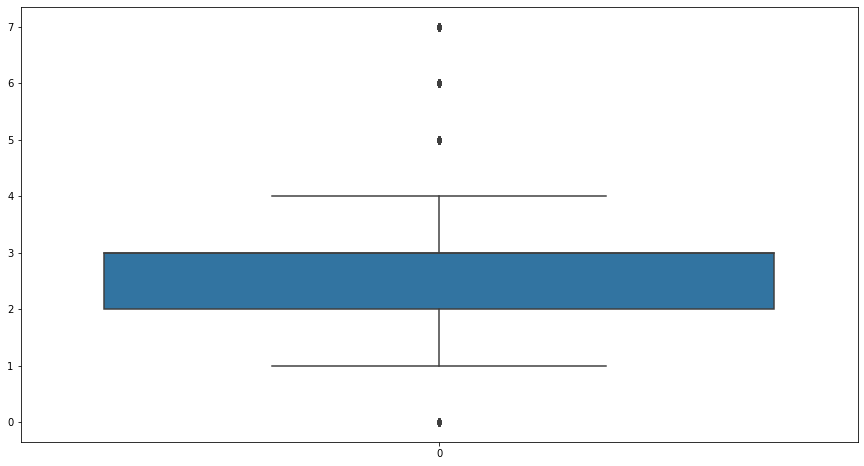

In [214]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=s_ambientes) 
plt.show()

Seleccionamos los indices donde los valores de rooms son na

In [215]:
index_rooms_null = df.loc[df['rooms'].isna()].index

Imputamos los ambientes extraidos a la columna rooms con valores nulos

In [216]:
df.loc[index_rooms_null, 'rooms'] = s_ambientes.loc[index_rooms_null]


In [217]:
df.rooms

0         2.0
1         NaN
2         2.0
3         3.0
4         1.0
         ... 
121215    2.0
121216    3.0
121217    NaN
121218    2.0
121219    NaN
Name: rooms, Length: 115688, dtype: float64

In [218]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 115688 entries, 0 to 121219
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   property_type               115688 non-null  object 
 1   place_name                  115688 non-null  object 
 2   state_name                  115688 non-null  object 
 3   geonames_id                 97161 non-null   float64
 4   lat-lon                     67049 non-null   object 
 5   price                       97818 non-null   float64
 6   currency                    97817 non-null   object 
 7   price_aprox_local_currency  97818 non-null   float64
 8   price_aprox_usd             97818 non-null   float64
 9   surface_total_in_m2         78630 non-null   float64
 10  surface_covered_in_m2       97944 non-null   float64
 11  price_usd_per_m2            66630 non-null   float64
 12  price_per_m2                85513 non-null   float64
 13  rooms         

Logramos reducir los valores nulos de rooms a el 27,58%

In [219]:
df.isnull().mean()

property_type                 0.000000
place_name                    0.000000
state_name                    0.000000
geonames_id                   0.160146
lat-lon                       0.420433
price                         0.154467
currency                      0.154476
price_aprox_local_currency    0.154467
price_aprox_usd               0.154467
surface_total_in_m2           0.320327
surface_covered_in_m2         0.153378
price_usd_per_m2              0.424054
price_per_m2                  0.260831
rooms                         0.275889
properati_url                 0.000000
description                   0.000017
title                         0.000000
dtype: float64

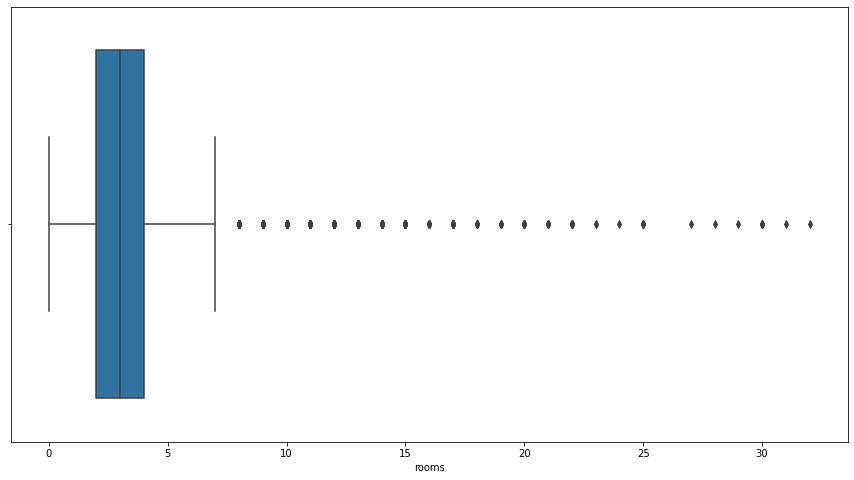

In [220]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='rooms') 
plt.show()
## tenemos posibles valores errados

<AxesSubplot:xlabel='rooms', ylabel='price_aprox_usd'>

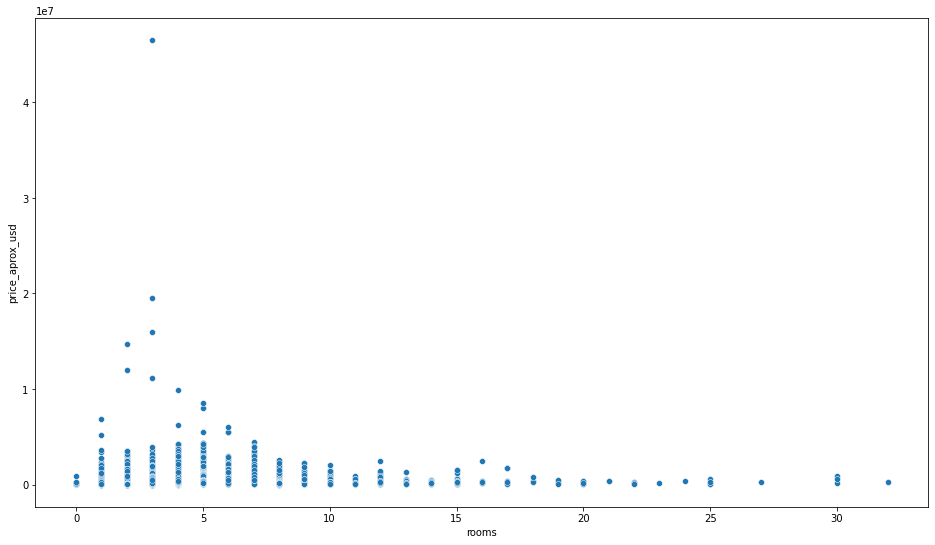

In [221]:
fig, ax = plt.subplots(1,figsize=(16,9))
sns.scatterplot(data=df, x='rooms', y='price_aprox_usd')

Hasta acá filtramos los maximos de los valores extraídos con expresiones regulares. El resto de los valores ya vienen directo desde el dataframe. Con motivo de generar un modelo más robustos definimos tomar el valor del cuantil 0.99 y recortar los valores de rooms a ese valor por tipo de propiedad. 

In [222]:
### sacamos valores del quantil 'X' para cada tipo de propiedad
# usamos ese valor para que no se sesgue por los outilers
df.property_type.value_counts()

apartment    68740
house        37554
PH            5523
store         3871
Name: property_type, dtype: int64

In [223]:
quantile = .99
rooms_apartment_quantile = df.loc[df.property_type =='apartment', 'rooms'].quantile(quantile)
rooms_house_quantile = df.loc[df.property_type =='house', 'rooms'].quantile(quantile)   
rooms_PH_quantile = df.loc[df.property_type =='PH', 'rooms'].quantile(quantile)
rooms_store_quantile = df.loc[df.property_type =='store', 'rooms'].quantile(quantile)

In [224]:
print('Consideramos outlier todo lo que exceda estos valores para cada tipo de propiedad')
print(f' apartment: {rooms_apartment_quantile}\n house: {rooms_house_quantile} \n PH: {rooms_PH_quantile}\n store:{rooms_store_quantile}')

Consideramos outlier todo lo que exceda estos valores para cada tipo de propiedad
 apartment: 6.0
 house: 10.0 
 PH: 7.0
 store:7.0


Vamos a imputar ahora los valores de los quantiles a todo lo que esté por encima de ellos en cada tipo de propiedad

In [225]:
# Creo un array con los tipos de propiedad para looper 
property_types = df.property_type.unique()
property_types

array(['PH', 'apartment', 'house', 'store'], dtype=object)

In [226]:
# Creo un diccionario para acceder a los valores de los quantiles a partir del property_type
quantiles_prop = {'PH': rooms_PH_quantile, 'apartment': rooms_apartment_quantile, 'house': rooms_house_quantile, 'store': rooms_store_quantile}


In [227]:
for type in property_types:
    index_to_replace = df.loc[(df['rooms']> quantiles_prop[type]) & (df['property_type'] ==type),:].index
    df.loc[index_to_replace, 'rooms'] = quantiles_prop[type]
    

Vemos como se recortan las puntas. El máximo queda en el quantile .99 de cada tipo de vivienda.

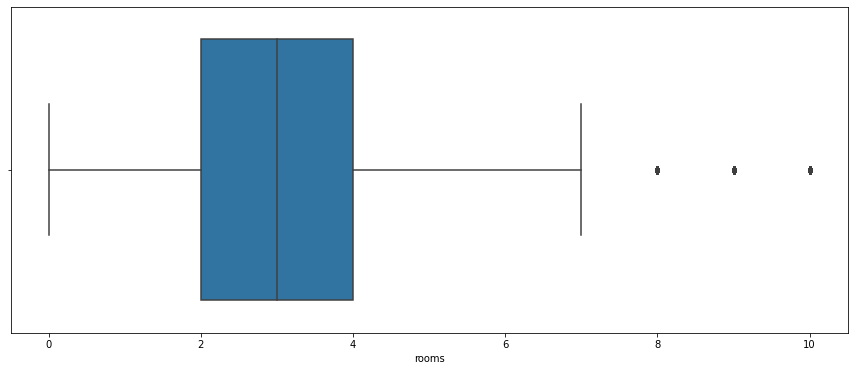

In [228]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='rooms') 
plt.show()

In [229]:
df.isna().sum()/df.shape[0]

property_type                 0.000000
place_name                    0.000000
state_name                    0.000000
geonames_id                   0.160146
lat-lon                       0.420433
price                         0.154467
currency                      0.154476
price_aprox_local_currency    0.154467
price_aprox_usd               0.154467
surface_total_in_m2           0.320327
surface_covered_in_m2         0.153378
price_usd_per_m2              0.424054
price_per_m2                  0.260831
rooms                         0.275889
properati_url                 0.000000
description                   0.000017
title                         0.000000
dtype: float64

##### Imputar NA con valores de cuartos promedio agrupado por state_name, place_name y property_type

In [230]:
df_rooms_means = df.groupby(['state_name', 'place_name', 'property_type'])['rooms'].mean()
df_rooms_means = df_rooms_means[df_rooms_means.notna()]
df_rooms_means


state_name                place_name               property_type
Bs.As. G.B.A. Zona Norte   Country Maschwitz Club  house            3.500000
                           los alamos              apartment        1.000000
                          Acacias Blancas          house            3.565217
                          Acassuso                 PH               3.400000
                                                   apartment        2.818182
                                                                      ...   
Santa Fe                  Susana                   house            2.000000
                          Timbúes                  house            1.000000
                          Venado Tuerto            house            9.000000
                          Villa Constitución       apartment        3.000000
                                                   house            2.555556
Name: rooms, Length: 1578, dtype: float64

In [231]:
df['rooms'].describe()

count    83771.000000
mean         2.861480
std          1.418935
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: rooms, dtype: float64

In [232]:
# Desempaquetamos el index para sacar el state_name, place_name y property_type que necesitamos para componer la asignacion
# Ademas nos permite ahorrar iteraciones donde el valor sea NA o en combinaciones que no existan
for state, place, prop_type in df_rooms_means.index:
        df.loc[(df['state_name'] == state) & (df['place_name'] == place) & \
                (df['property_type'] == prop_type) & df['rooms'].isna(),'rooms'] = df_rooms_means[state,place,prop_type]

In [233]:
df.rooms.isna().sum()

808

Imputemos al resto de los valores faltantes el promedio de cuartos del dataframe:


In [234]:
df.loc[df['rooms'].isna(), 'rooms'] = df['rooms'].mean()

In [235]:
df.rooms.describe()

count    115688.000000
mean          2.840015
std           1.268229
min           0.000000
25%           2.000000
50%           2.967213
75%           3.285714
max          10.000000
Name: rooms, dtype: float64

#### 4. Trabajo con las columnas de price

Vamos a dropear las columnas donde no haya ningun tipo de información relacionada al precio

In [236]:
prices_nulos_index = df[df.price.isna() & df.price_aprox_local_currency.isna() 
                        & df.price_aprox_usd.isna() & df.price_usd_per_m2.isna() 
                        & df.price_per_m2.isna()].index

In [237]:
df.drop(index=prices_nulos_index, inplace=True)
print(df.shape)

(97818, 17)


In [238]:
df.isna().mean()

property_type                 0.000000
place_name                    0.000000
state_name                    0.000000
geonames_id                   0.172208
lat-lon                       0.414474
price                         0.000000
currency                      0.000010
price_aprox_local_currency    0.000000
price_aprox_usd               0.000000
surface_total_in_m2           0.316291
surface_covered_in_m2         0.125774
price_usd_per_m2              0.318837
price_per_m2                  0.125795
rooms                         0.000000
properati_url                 0.000000
description                   0.000020
title                         0.000000
dtype: float64

Vemos la distribucion de los precios

<AxesSubplot:ylabel='Frequency'>

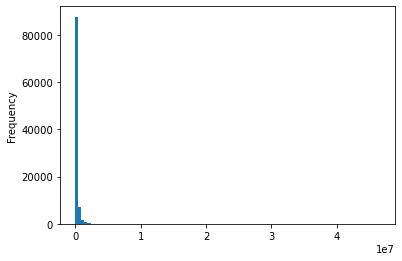

In [239]:
df.price_aprox_usd.plot(kind='hist', bins=100)

96733


<AxesSubplot:ylabel='Frequency'>

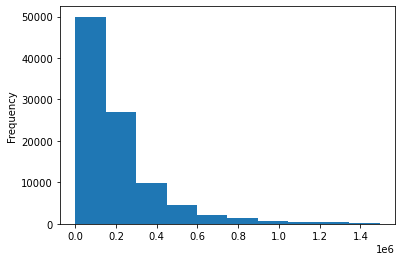

In [240]:
print(df[df.price_aprox_usd < df.price_aprox_usd.quantile(0.99)].shape[0])
df[df.price_aprox_usd < df.price_aprox_usd.quantile(0.99)].price_aprox_usd.plot(kind='hist')

Nos quedamos con los valores por debajo del quartile .99

In [241]:
df = df[df.price_aprox_usd < df.price_aprox_usd.quantile(0.99)]

<AxesSubplot:xlabel='price_aprox_usd', ylabel='Count'>

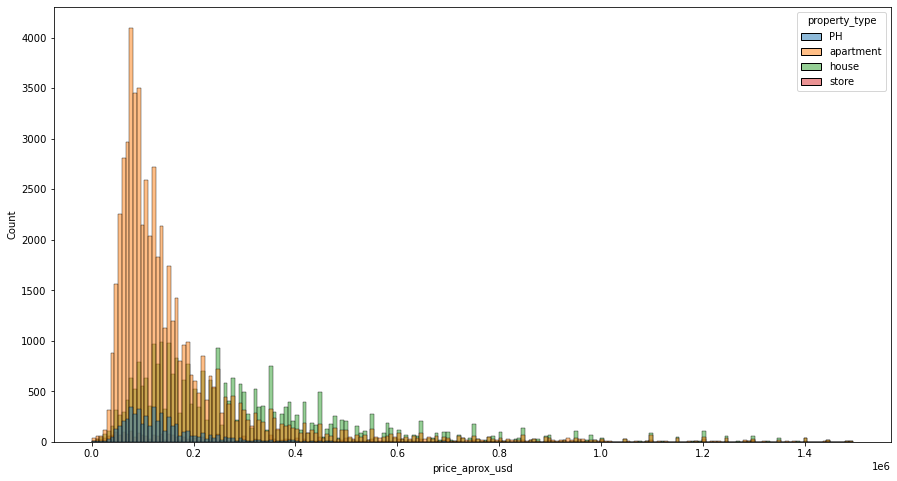

In [242]:
fig, ax= plt.subplots(1,figsize=(15,8))
sns.histplot(data=df, x='price_aprox_usd', hue='property_type')#df.price_aprox_usd.plot(kind='hist')

Vamos a ver los valores minimos:

In [176]:
(df.price_aprox_usd /1000).describe()
# en miles de dolares

count    96733.000000
mean       215.537719
std        205.398231
min          0.000000
25%         89.650000
50%        144.900000
75%        260.000000
max       1494.502000
Name: price_aprox_usd, dtype: float64

Nos vamos a quedar con price_aprox_usd por lo que dropeamos el resto

In [245]:
# Guardamos los nombres de columnas que empiezan con price
price_columns = df.columns[df.columns.str.startswith(r'price')].values
print(price_columns)

# Pasamos la lista filtrando la columna price que nos interesa para dropear
df = df.drop([column for column in price_columns if column != 'price_aprox_usd'], axis=1)
df.info()

['price' 'price_aprox_local_currency' 'price_aprox_usd' 'price_usd_per_m2'
 'price_per_m2']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96733 entries, 0 to 121219
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          96733 non-null  object 
 1   place_name             96733 non-null  object 
 2   state_name             96733 non-null  object 
 3   geonames_id            80103 non-null  float64
 4   lat-lon                56645 non-null  object 
 5   currency               96732 non-null  object 
 6   price_aprox_usd        96733 non-null  float64
 7   surface_total_in_m2    66106 non-null  float64
 8   surface_covered_in_m2  84545 non-null  float64
 9   rooms                  96733 non-null  float64
 10  properati_url          96733 non-null  object 
 11  description            96731 non-null  object 
 12  title                  96733 non-null  object 
dtypes: float64(5)

### 5. Vamos a trabajar con las superficies

Creamos primero una columna donde guardamos el ratio de superficie cubierta / superficie total

In [246]:
df['surface_ratio'] = df['surface_covered_in_m2'] / df['surface_total_in_m2']
df['surface_ratio'].describe()

count    61131.000000
mean         0.874328
std          3.927486
min          0.000000
25%          0.781818
50%          0.904762
75%          1.000000
max        942.307692
Name: surface_ratio, dtype: float64

Se puede ver que hay ratios mayores a 1. Por lo que podría haber un error. Vamos a ver las filas con surface_ratio > 1

In [247]:
# Hay varios ejemplos como este donde se ve que el dato esta cargado al revés
sample = df.loc[df.surface_ratio > 1, [ 'surface_total_in_m2', 'surface_covered_in_m2', 'description']].loc[55725]
print(sample)
print(sample.description)

surface_total_in_m2                                                    130
surface_covered_in_m2                                                  384
description              CODIGO: 2388-LLG1122 ubicado en: Podestá 764 -...
Name: 55725, dtype: object
CODIGO: 2388-LLG1122 ubicado en: Podestá 764 -  Publicado por: LUIS LORAY NEGOCIOS INMOBILIARIOS. El precio es de USD 130000 null. Lote de 12 por 32m. Superficie cubierta 130m2. Propiedad compuesta por living y comedor diario integrado con pisos de porcelanato, aire acondicionado y ventanal al frente. Cocina totalmente amueblada con desayunador y aberturas con vista al parque. Tres dormitorios con pisos de cerámicos y placards. Escritorio, toillete y baño principal. Galería semicubierta con parrilla, lavadero y cuarto de enseres. Además la propiedad cuenta con parque libre, y todo el techo de loza.  LUIS LORAY NEGOCIOS INMOBILIARIOS / .  . Publicado a través de Mapaprop


Vamos a suponer que estos casos son errores de carga e invertir los valores

In [248]:
to_replace_covered = df.loc[df.surface_ratio > 1, 'surface_total_in_m2'].copy()
to_replace_total = df.loc[df.surface_ratio > 1, 'surface_covered_in_m2'].copy()
print(to_replace_covered.shape, to_replace_total.shape)

(945,) (945,)


Realizamos el reemplazo

In [249]:
df.loc[df.surface_ratio > 1, 'surface_total_in_m2'] = to_replace_total
df.loc[df.surface_ratio > 1, 'surface_covered_in_m2'] = to_replace_covered

Vemos que si calculamos nuevamente ya no tenemos superficies totales mayores a las cubiertas

In [250]:
df['surface_ratio'] = df['surface_covered_in_m2'] / df['surface_total_in_m2']
df['surface_ratio'].describe()

count    61131.000000
mean         0.827668
std          0.218765
min          0.000000
25%          0.773333
50%          0.901235
75%          1.000000
max          1.000000
Name: surface_ratio, dtype: float64

#### Vamos a hacer lo mismo que hicimos antes. Imputamos la superficie total según el promedio de un groupby 

Vamos a ver la cantidad de valores a completar

In [251]:
surfaces_to_complete = df[df['surface_covered_in_m2'].notna() & df['surface_total_in_m2'].isna()]
surfaces_to_complete.shape

(23414, 14)

In [252]:
df_mean_surface_ratio = df.pivot_table(values='surface_ratio', index=['state_name','property_type'], aggfunc='mean')
df_mean_surface_ratio

surface_ratio
state_name                   property_type               
Bs.As. G.B.A. Zona Norte     PH                  0.828151
                             apartment           0.847809
                             house               0.728975
                             store               0.931096
Bs.As. G.B.A. Zona Oeste     PH                  0.768526
                             apartment           0.905049
                             house               0.663726
                             store               0.855974
Bs.As. G.B.A. Zona Sur       PH                  0.810525
                             apartment           0.912269
                             house               0.761035
                             store               0.878106
Buenos Aires Costa Atlántica PH                  0.830390
                             apartment           0.924983
                             house               0.568530
                             store               0.909506
Buenos Aires Interior        PH                  0.861284
                             apartment           0.923836
                             house               0.546810
                             store               0.864820
Capital Federal              PH                  0.789767
                             apartment           0.892436
                             house               0.692504
                             store               0.962087
Córdoba                      PH                  0.758428
                             apartment           0.857582
                             house               0.620279
                             store               0.902728
Santa Fe                     PH                  0.828310
                             apartment           0.888461
                             house               0.664073
                             store               0.970423

In [254]:
df_mean_surface_ratio.loc[('Bs.As. G.B.A. Zona Norte','PH'),'surface_ratio']

0.8281510580669719

Ahora vamos a:
 - Extraer los valores de los indices para acceder a cada elemento del df_mean_surface_ratio y usarlos para filtrar el dataframe.
 - Seleccionamos state y prop_type donde surface_total sea nula pero surface_covered no lo sea.
 - Con esa mascara seleccionamos la superficie total (que en cada iteracion me va a dar la de un state/propType diferente), 
 - Hacemos un apply sobre la superficie cubierta en esa misma mascara para dividirla por el ratio y así imputar el valor a surface_total

 Pero también incluimos a las superficies totales con valor 0 como si fueran NA

In [255]:
for state, prop_type in df_mean_surface_ratio.index:
        mask = (df['state_name'] == state) & \
                (df['property_type'] == prop_type) & \
                (df['surface_total_in_m2'].isna() | \
                (df['surface_total_in_m2'] == 0)) & \
                df['surface_covered_in_m2'].notna()

        df.loc[mask,'surface_total_in_m2'] = df.loc[mask,'surface_covered_in_m2']\
        .apply(lambda x: x / df_mean_surface_ratio.loc[(state,prop_type),'surface_ratio'])

Vemos que logramos llenar todos los lugares donde la superficie total no estaba pero teníamos datos de superficie cubierta.

In [256]:
df[df['surface_covered_in_m2'].notna() & df['surface_total_in_m2'].isna()].shape

(0, 14)

Vemos algunos ejemplos para ver si se rellenó bien

In [257]:
# Tomamos los indices del dataframe que se hizo mas arriba con las filas a completar y vemos 5 filas al azar
df.loc[surfaces_to_complete.sample(5).index]

,property_type,place_name,state_name,geonames_id,lat-lon,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,properati_url,description,title,surface_ratio
17254,house,Punilla,Córdoba,3839996.0,"-31.39206,-64.499265",USD,390000.0,628.748873,390.0,5.000000,http://www.properati.com.ar/171ao_venta_casa_p...,Corredor Responsable: Juan Manuel Quiroga - CP...,HERMOSA CASA UBICADA EN VILLA DEL LAGO CARLOS PAZ,NaN
38195,PH,Villa Martelli,Bs.As. G.B.A. Zona Norte,NaN,"-34.548356,-58.500317",USD,135000.0,24.150183,20.0,3.000000,http://www.properati.com.ar/18ko5_venta_ph_vil...,Corredor Responsable: Mario Gabriel Gerez - CM...,Venta Ph 3 amb en Villa Martelli,NaN
59741,house,Villa Lynch,Bs.As. G.B.A. Zona Norte,3832698.0,"-34.589294,-58.560661",USD,118000.0,150.896859,110.0,3.000000,http://www.properati.com.ar/19xw1_venta_casa_v...,Corredor Responsable: Marisol Espinosa - CMCPM...,CASA 3 AMBIENTES RECICLADA A NUEVO 2 COCHERAS,NaN
90369,apartment,Córdoba,Córdoba,3860259.0,NaN,ARS,54962.0,107.278411,92.0,2.055108,http://www.properati.com.ar/1ba2n_venta_depart...,"Departamento, Córdoba, Córdoba, por $ 980.000",Departamento - Alto Alberdi,NaN
35040,house,Tortuguitas,Bs.As. G.B.A. Zona Norte,NaN,"-34.480949,-58.765397",USD,179000.0,329.229511,240.0,6.000000,http://www.properati.com.ar/18dh2_venta_casa_t...,Corredor Responsable: Mario Gabriel Gerez - CM...,"VENTA PQUE ALVEAR- TORTUGUITAS-EXCEL.PROP, 4 DOR",NaN


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96733 entries, 0 to 121219
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          96733 non-null  object 
 1   place_name             96733 non-null  object 
 2   state_name             96733 non-null  object 
 3   geonames_id            80103 non-null  float64
 4   lat-lon                56645 non-null  object 
 5   currency               96732 non-null  object 
 6   price_aprox_usd        96733 non-null  float64
 7   surface_total_in_m2    89520 non-null  float64
 8   surface_covered_in_m2  84545 non-null  float64
 9   rooms                  96733 non-null  float64
 10  properati_url          96733 non-null  object 
 11  description            96731 non-null  object 
 12  title                  96733 non-null  object 
 13  surface_ratio          61131 non-null  float64
dtypes: float64(6), object(8)
memory usage: 13.6+ MB


### Vamos a ver ahora cuantos casos hay al reves. Tenemos superficie total pero no superficie cubierta

In [259]:
df[df.surface_total_in_m2.notna() & df.surface_covered_in_m2.isna()].shape

(4975, 14)

Aplicamos la misma lógica que antes:

In [260]:
for state, prop_type in df_mean_surface_ratio.index:
        mask = (df['state_name'] == state) & \
                (df['property_type'] == prop_type) & \
                df['surface_total_in_m2'].notna() & \
                df['surface_covered_in_m2'].isna() # notar que notna y isna estan invertidos con respecto al anterior, obviamente

        df.loc[mask,'surface_covered_in_m2'] = df.loc[mask,'surface_total_in_m2'].apply(lambda x: x *  df_mean_surface_ratio.loc[(state,prop_type),'surface_ratio'])

Logramos reducir los valores nulos

In [261]:
df[df.surface_total_in_m2.notna() & df.surface_covered_in_m2.isna()].shape

(0, 14)

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96733 entries, 0 to 121219
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          96733 non-null  object 
 1   place_name             96733 non-null  object 
 2   state_name             96733 non-null  object 
 3   geonames_id            80103 non-null  float64
 4   lat-lon                56645 non-null  object 
 5   currency               96732 non-null  object 
 6   price_aprox_usd        96733 non-null  float64
 7   surface_total_in_m2    89520 non-null  float64
 8   surface_covered_in_m2  89520 non-null  float64
 9   rooms                  96733 non-null  float64
 10  properati_url          96733 non-null  object 
 11  description            96731 non-null  object 
 12  title                  96733 non-null  object 
 13  surface_ratio          61131 non-null  float64
dtypes: float64(6), object(8)
memory usage: 13.6+ MB


Para asegurar que se completen los valores pendientes vamos a aplicar la media de sup_total y sup_cub de cada provincia a esos valores faltantes en superficies

In [263]:
df_surfaces_states_means = df.groupby(['state_name', 'property_type'])[['surface_total_in_m2', 'surface_covered_in_m2']].mean()
df_surfaces_states_means.head()

surface_total_in_m2  \
state_name               property_type                        
Bs.As. G.B.A. Zona Norte PH                      108.289000   
                         apartment                91.430525   
                         house                   428.957998   
                         store                   319.924849   
Bs.As. G.B.A. Zona Oeste PH                      117.853505   

                                        surface_covered_in_m2  
state_name               property_type                         
Bs.As. G.B.A. Zona Norte PH                         86.375982  
                         apartment                  73.001359  
                         house                     229.654163  
                         store                     287.262281  
Bs.As. G.B.A. Zona Oeste PH                         78.063968

Vamos a rellenar ahora con estos valores:

Pero antes hay que notar una cosa:

In [264]:
df.loc[df.surface_total_in_m2 <5,['surface_total_in_m2','surface_covered_in_m2']]

,surface_total_in_m2,surface_covered_in_m2
205,0.000000,0.0
206,0.000000,0.0
349,1.166070,1.0
561,0.000000,0.0
562,0.000000,0.0
...,...,...
116328,0.000000,0.0
116947,1.179511,1.0
116956,1.371790,1.0
118839,0.000000,0.0


Tenemos valores donde superficie total, y superficie cubierta es 0 o se imputó la superficie total siendo la cubierta 1, lo que claramente se ve como un error

Por eso vamos a imputar junto con los NA las superficies totales menores a 5:

In [265]:
for state, prop_type in df_surfaces_states_means.index:
    df.loc[(df['state_name'] == state) & (df['property_type'] == prop_type) & (df.surface_covered_in_m2.isna()),'surface_covered_in_m2'] = \
        df_surfaces_states_means.loc[(state,prop_type), 'surface_covered_in_m2']

    df.loc[(df['state_name'] == state) & (df['property_type'] == prop_type) & (df.surface_total_in_m2.isna() | (df.surface_total_in_m2 < 5)),'surface_total_in_m2'] = \
        df_surfaces_states_means.loc[(state,prop_type), 'surface_total_in_m2']

Vemos que ya no quedan valores vacios

In [266]:
df[df.surface_covered_in_m2.isna() | df.surface_total_in_m2.isna()].shape

(0, 14)

In [268]:
print(f'Total Filas: {df.shape[0]}')
df.isna().mean()

Total Filas: 96733


property_type            0.000000
place_name               0.000000
state_name               0.000000
geonames_id              0.171917
lat-lon                  0.414419
currency                 0.000010
price_aprox_usd          0.000000
surface_total_in_m2      0.000000
surface_covered_in_m2    0.000000
rooms                    0.000000
properati_url            0.000000
description              0.000021
title                    0.000000
surface_ratio            0.368044
dtype: float64

### Vamos a quitar los outliers de la superficie

Esta es la distribucion de la superficie cubierta vista desde los states:

<AxesSubplot:xlabel='surface_total_in_m2', ylabel='state_name'>

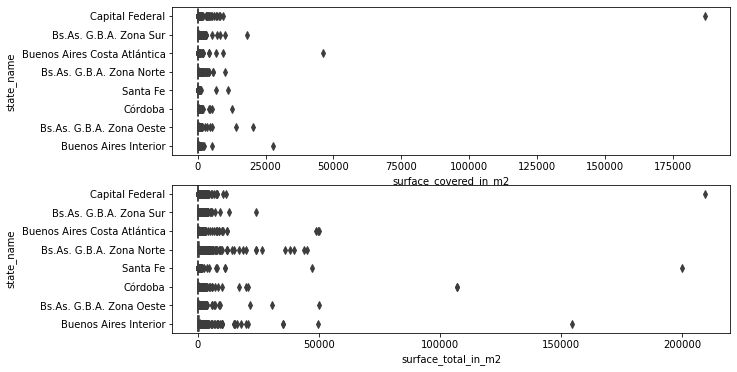

In [269]:
figure, ax = plt.subplots(2,1, figsize=(10,6))
sns.boxplot(data=df, x="surface_covered_in_m2", y="state_name", ax=ax[0])
sns.boxplot(data=df, x="surface_total_in_m2", y="state_name", ax=ax[1])

Se ve que hay un par de outliers que achican mucho el boxplot. Vemos si quitando el .01 de los valores superiores ajusta un poco la distribucion

Quantile value Covered=  509.2200557136071
Quantile value Total=  1184.679999999993
Cantidad de filas restantes: 95071


<AxesSubplot:xlabel='surface_total_in_m2', ylabel='state_name'>

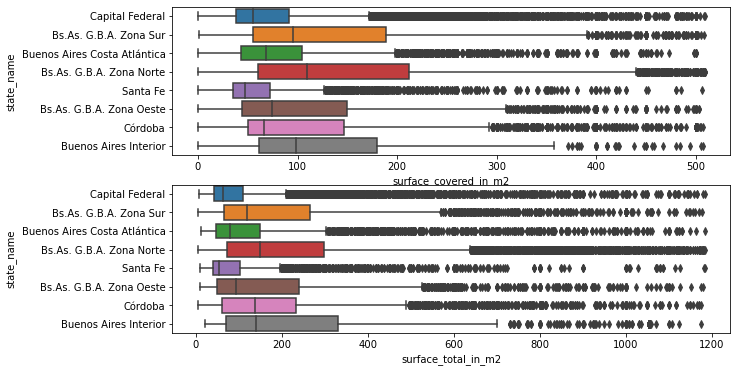

In [270]:
quantile = .99
quantile_covered = df.surface_covered_in_m2.quantile(quantile)
quantile_total = df.surface_total_in_m2.quantile(quantile)
print('Quantile value Covered= ', quantile_covered)
print('Quantile value Total= ', quantile_total)
print(f'Cantidad de filas restantes: {df[(df.surface_covered_in_m2 < quantile_covered) & (df.surface_total_in_m2 < quantile_total)].shape[0]}')


figure, ax = plt.subplots(2,1, figsize=(10,6))
sns.boxplot(data=df[df.surface_covered_in_m2 < quantile_covered], x="surface_covered_in_m2", y="state_name", ax=ax[0])
sns.boxplot(data=df[df.surface_total_in_m2 < quantile_total], x="surface_total_in_m2", y="state_name", ax=ax[1])

Esa distribución se ve menos afectada por posibles valores errones. Así que recortamos el dataframe:

In [271]:
df = df[(df['surface_covered_in_m2'] < quantile_covered) & (df['surface_total_in_m2'] < quantile_total)]


## PROBAMOS EXTRAER CARACTERISTICAS DE LA URL Y DESCRIPCION

Hacemos un split en la url sobre '_' y nos quedamos desde el primer elemento en adelante (ya que en todas las urls el primer elemento es un codigo de la pagina que no nos sirve)

In [272]:
df['url_first_split'] = df['properati_url'].apply(lambda x: x.split('_')[1::])
#Esta columna ahora contiene un array con las caracteristicas extraidas
df['url_first_split']

0         [venta, ph, mataderos, lavadero, patio, inmobi...
1         [venta, departamentos, la-plata, balcon, lavad...
2         [venta, departamentos, mataderos, lavadero, pl...
3                   [venta, ph, liniers, patio, g-goffredo]
4         [venta, departamentos, centro, cristina-pavone...
                                ...                        
121215    [venta, departamento, belgrano, balcon, suite,...
121216    [venta, casa, beccar, suite, hidromasaje, jard...
121217    [venta, departamento, villa-urquiza, holmberg,...
121218    [venta, departamento, plaza-colon, lavadero, l...
121219    [venta, departamento, capital-federal, baulera...
Name: url_first_split, Length: 95071, dtype: object

In [273]:
df['url_first_split'].explode().value_counts().head(20)

venta                 94962
departamento          57898
garage                44696
lavadero              35770
balcon                34406
casa                  29379
parrilla              27897
luminoso              27249
piscina               24865
placard               22335
suite                 20982
terraza               20667
toilette              18985
patio                 16727
vestidor              13956
jardin                13904
aire-acondicionado    10660
sum                    9953
dependencias           9190
baulera                8997
Name: url_first_split, dtype: int64

Se ven varias caracteristicas interesantes con varias apariciones que se pueden utilizar. 

In [274]:
caracteristicas = ['garage', 'lavadero','balcon','parrilla','piscina','terraza','patio','jardin','sum','quincho','estrenar' ]

Creamos una nueva columna para guardar valores 1/0 que indican presencia o no de esa caracteristica

In [275]:
for feature in caracteristicas:
    df[feature] = df.url_first_split.apply(lambda x: 1 if feature in x else 0)

Controlamos:

In [276]:
df[caracteristicas]

,garage,lavadero,balcon,parrilla,piscina,terraza,patio,jardin,sum,quincho,estrenar
0,0,1,0,0,0,0,1,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
121215,1,0,1,1,1,0,0,0,0,1,0
121216,1,0,0,1,1,0,0,1,0,1,0
121217,1,1,1,1,0,1,0,0,0,0,1
121218,0,1,0,0,0,0,0,0,0,0,0


In [277]:
df[caracteristicas].sum()

garage      44696
lavadero    35770
balcon      34406
parrilla    27897
piscina     24865
terraza     20667
patio       16727
jardin      13904
sum          9953
quincho      8793
estrenar     8794
dtype: int64

In [278]:
df.columns

Index(['property_type', 'place_name', 'state_name', 'geonames_id', 'lat-lon',
       'currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'rooms', 'properati_url', 'description',
       'title', 'surface_ratio', 'url_first_split', 'garage', 'lavadero',
       'balcon', 'parrilla', 'piscina', 'terraza', 'patio', 'jardin', 'sum',
       'quincho', 'estrenar'],
      dtype='object')

## Vamos a dropear las columnas que ya no utilizamos

In [279]:
df = df.drop(['surface_ratio','currency','properati_url','description','title','surface_ratio','url_first_split'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95071 entries, 0 to 121219
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          95071 non-null  object 
 1   place_name             95071 non-null  object 
 2   state_name             95071 non-null  object 
 3   geonames_id            78814 non-null  float64
 4   lat-lon                55783 non-null  object 
 5   price_aprox_usd        95071 non-null  float64
 6   surface_total_in_m2    95071 non-null  float64
 7   surface_covered_in_m2  95071 non-null  float64
 8   rooms                  95071 non-null  float64
 9   garage                 95071 non-null  int64  
 10  lavadero               95071 non-null  int64  
 11  balcon                 95071 non-null  int64  
 12  parrilla               95071 non-null  int64  
 13  piscina                95071 non-null  int64  
 14  terraza                95071 non-null  int64  
 15  p

In [280]:
# Decidimos trabajar con la información Geoespacial en relación con los servicios publicos de transporte en Capital Federal
# por ende nos quedamos sólo con capital federal
df = df.loc[df.state_name == 'Capital Federal']

# Geopandas

#### Cuidado con correr esta sección, puede demorar 30 min o más. En el analisis descriptivo se usa un csv ya exportado

In [281]:
df.shape

(28399, 20)

In [282]:
df_original = df.copy()

In [283]:
df.head()

,property_type,place_name,state_name,geonames_id,lat-lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,garage,lavadero,balcon,parrilla,piscina,terraza,patio,jardin,sum,quincho,estrenar
0,PH,Mataderos,Capital Federal,3430787.0,"-34.6618237,-58.5088387",62000.0,55.000000,40.000000,2.000000,0,1,0,0,0,0,1,0,0,0,0
2,apartment,Mataderos,Capital Federal,3430787.0,"-34.6522615,-58.5229825",72000.0,55.000000,55.000000,2.000000,0,1,0,0,0,0,0,0,0,0,0
3,PH,Liniers,Capital Federal,3431333.0,"-34.6477969,-58.5164244",95000.0,120.857451,91.601224,3.000000,0,0,0,0,0,0,1,0,0,0,0
7,apartment,Belgrano,Capital Federal,3436077.0,"-34.5598729,-58.443362",138000.0,45.000000,40.000000,2.852152,0,1,0,0,1,0,0,0,0,0,1
8,apartment,Belgrano,Capital Federal,3436077.0,"-34.5598729,-58.443362",195000.0,65.000000,60.000000,2.852152,0,1,0,0,1,0,0,0,0,0,1


In [284]:
df.isna().mean()

property_type            0.000000
place_name               0.000000
state_name               0.000000
geonames_id              0.039121
lat-lon                  0.233917
price_aprox_usd          0.000000
surface_total_in_m2      0.000000
surface_covered_in_m2    0.000000
rooms                    0.000000
garage                   0.000000
lavadero                 0.000000
balcon                   0.000000
parrilla                 0.000000
piscina                  0.000000
terraza                  0.000000
patio                    0.000000
jardin                   0.000000
sum                      0.000000
quincho                  0.000000
estrenar                 0.000000
dtype: float64

Extraemos en otro dataset las columnas con las que vamos a trabajar:

In [285]:
df_geo = df.loc[df['lat-lon'].notna(),['state_name', 'place_name', 'lat-lon']]
df_geo.head()

,state_name,place_name,lat-lon
0,Capital Federal,Mataderos,"-34.6618237,-58.5088387"
2,Capital Federal,Mataderos,"-34.6522615,-58.5229825"
3,Capital Federal,Liniers,"-34.6477969,-58.5164244"
7,Capital Federal,Belgrano,"-34.5598729,-58.443362"
8,Capital Federal,Belgrano,"-34.5598729,-58.443362"


Transformamos lat y lon en columnas separadas:


In [286]:
df_geo['lat'] = df_geo['lat-lon'].apply(lambda x : x.split(',')[0]  )
df_geo['lon'] = df_geo['lat-lon'].apply(lambda x : x.split(',')[1]  )
df_geo.head()

,state_name,place_name,lat-lon,lat,lon
0,Capital Federal,Mataderos,"-34.6618237,-58.5088387",-34.6618237,-58.5088387
2,Capital Federal,Mataderos,"-34.6522615,-58.5229825",-34.6522615,-58.5229825
3,Capital Federal,Liniers,"-34.6477969,-58.5164244",-34.6477969,-58.5164244
7,Capital Federal,Belgrano,"-34.5598729,-58.443362",-34.5598729,-58.443362
8,Capital Federal,Belgrano,"-34.5598729,-58.443362",-34.5598729,-58.443362


Asignamos la geometría:

In [290]:
geometria = gpd.points_from_xy(df_geo['lon'], df_geo['lat'])
geometria[0:2]

<GeometryArray>
[<shapely.geometry.point.Point object at 0x000001C9ECD7CB08>, <shapely.geometry.point.Point object at 0x000001C9E344AB08>]
Length: 2, dtype: geometry

Convertimos a geodataframe:


In [291]:
geo_df = gpd.GeoDataFrame(df_geo, geometry=geometria)
geo_df.head()

,state_name,place_name,lat-lon,lat,lon,geometry
0,Capital Federal,Mataderos,"-34.6618237,-58.5088387",-34.6618237,-58.5088387,POINT (-58.50884 -34.66182)
2,Capital Federal,Mataderos,"-34.6522615,-58.5229825",-34.6522615,-58.5229825,POINT (-58.52298 -34.65226)
3,Capital Federal,Liniers,"-34.6477969,-58.5164244",-34.6477969,-58.5164244,POINT (-58.51642 -34.64780)
7,Capital Federal,Belgrano,"-34.5598729,-58.443362",-34.5598729,-58.443362,POINT (-58.44336 -34.55987)
8,Capital Federal,Belgrano,"-34.5598729,-58.443362",-34.5598729,-58.443362,POINT (-58.44336 -34.55987)


Importamos data de subtes:

In [295]:
def read_geo(path, lon_col="lon", lat_col="lat", from_crs="EPSG:4326", to_crs="EPSG:5341", **kwargs):
    df = pd.read_csv(path, **kwargs).rename(columns={lon_col: "lon", lat_col: "lat"})
    geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs=from_crs)
    
    return geo[~geo.geometry.isna()].to_crs(to_crs) 


geo_subte = read_geo(f"../data/estaciones-de-subte.csv", 'long')
geo_subte.head(10)

,lon,lat,id,estacion,linea,geometry
0,-58.398928,-34.635750,1.0,CASEROS,H,POINT (2752843.207 -4474495.110)
1,-58.400970,-34.629376,2.0,INCLAN - MEZQUITA AL AHMAD,H,POINT (2752894.312 -4474935.513)
2,-58.402323,-34.623092,3.0,HUMBERTO 1°,H,POINT (2752996.147 -4475337.879)
3,-58.404732,-34.615242,4.0,VENEZUELA,H,POINT (2753067.184 -4475875.033)
4,-58.406036,-34.608935,5.0,ONCE - 30 DE DICIEMBRE,H,POINT (2753173.468 -4476276.230)
5,-58.380574,-34.604245,6.0,9 DE JULIO,D,POINT (2755317.354 -4475303.910)
6,-58.397924,-34.599757,7.0,FACULTAD DE MEDICINA,D,POINT (2754110.243 -4476378.834)
7,-58.385142,-34.601587,8.0,TRIBUNALES - TEATRO COLÓN,D,POINT (2755048.321 -4475666.167)
8,-58.407161,-34.591628,9.0,AGÜERO,D,POINT (2753656.739 -4477258.950)
9,-58.415955,-34.585156,10.0,R.SCALABRINI ORTIZ,D,POINT (2753182.970 -4478028.736)


Creamos una columna en ceros para asginar el valor


In [296]:
geo_df['min_subte'] = 0
geo_df.head()

,state_name,place_name,lat-lon,lat,lon,geometry,min_subte
0,Capital Federal,Mataderos,"-34.6618237,-58.5088387",-34.6618237,-58.5088387,POINT (-58.50884 -34.66182),0
2,Capital Federal,Mataderos,"-34.6522615,-58.5229825",-34.6522615,-58.5229825,POINT (-58.52298 -34.65226),0
3,Capital Federal,Liniers,"-34.6477969,-58.5164244",-34.6477969,-58.5164244,POINT (-58.51642 -34.64780),0
7,Capital Federal,Belgrano,"-34.5598729,-58.443362",-34.5598729,-58.443362,POINT (-58.44336 -34.55987),0
8,Capital Federal,Belgrano,"-34.5598729,-58.443362",-34.5598729,-58.443362,POINT (-58.44336 -34.55987),0


Con un for generamos una lista de distancias de cada punto a cada subte y despues sacamos el valor mínimo:


In [297]:
import geopy
for i in geo_df.index:
    distancias = []
    for j in geo_subte.index:
        punto_1 = (geo_subte.lon[j], geo_subte.lat[j])
        punto_2 = (geo_df.lon[i], geo_df.lat[i])
        dist = geopy.distance.geodesic(punto_1,punto_2)
        distancias.append(dist.meters)
    geo_df.loc[i,'min_subte'] = np.min(distancias)
      
geo_df.head()

,state_name,place_name,lat-lon,lat,lon,geometry,min_subte
0,Capital Federal,Mataderos,"-34.6618237,-58.5088387",-34.6618237,-58.5088387,POINT (-58.50884 -34.66182),4728.393676
2,Capital Federal,Mataderos,"-34.6522615,-58.5229825",-34.6522615,-58.5229825,POINT (-58.52298 -34.65226),6073.153602
3,Capital Federal,Liniers,"-34.6477969,-58.5164244",-34.6477969,-58.5164244,POINT (-58.51642 -34.64780),5305.630900
7,Capital Federal,Belgrano,"-34.5598729,-58.443362",-34.5598729,-58.443362,POINT (-58.44336 -34.55987),609.743234
8,Capital Federal,Belgrano,"-34.5598729,-58.443362",-34.5598729,-58.443362,POINT (-58.44336 -34.55987),609.743234


Vamos a buscar la cantidad de lineas diferentes que se encuentran a menos de 500m. Para eso filtramos aquellas que en la lista anterior sean 
mayores a 500 para no duplicar la carga de operaciones innecesariamente

In [301]:
geo_df['subtes_menor_500m'] = 0
index_min_500 = geo_df[geo_df.min_subte < 500].index
index_min_500

Int64Index([    21,     48,     51,     52,     53,     54,     55,     57,
                59,     66,
            ...
            121121, 121131, 121134, 121148, 121151, 121152, 121153, 121158,
            121160, 121209],
           dtype='int64', length=12637)

Con un for generamos una lista de las diferentes lineas con una distancia menor a 500mts:

In [302]:
for i in index_min_500:
    lineas = []
    for j in geo_subte.index:
        punto_1 = (geo_subte.lon[j], geo_subte.lat[j])
        punto_2 = (geo_df.lon[i], geo_df.lat[i])
        dist = geopy.distance.geodesic(punto_1,punto_2)
        
        if dist.meters < 500:
            lineas.append(geo_subte.linea[j])
            # index.append(j)
        else:
            pass
    
    geo_df.loc[i,'subtes_menor_500m'] = len(set(lineas))

In [303]:
geo_df.head()

,state_name,place_name,lat-lon,lat,lon,geometry,min_subte,subtes_menor_500m
0,Capital Federal,Mataderos,"-34.6618237,-58.5088387",-34.6618237,-58.5088387,POINT (-58.50884 -34.66182),4728.393676,0
2,Capital Federal,Mataderos,"-34.6522615,-58.5229825",-34.6522615,-58.5229825,POINT (-58.52298 -34.65226),6073.153602,0
3,Capital Federal,Liniers,"-34.6477969,-58.5164244",-34.6477969,-58.5164244,POINT (-58.51642 -34.64780),5305.630900,0
7,Capital Federal,Belgrano,"-34.5598729,-58.443362",-34.5598729,-58.443362,POINT (-58.44336 -34.55987),609.743234,0
8,Capital Federal,Belgrano,"-34.5598729,-58.443362",-34.5598729,-58.443362,POINT (-58.44336 -34.55987),609.743234,0


In [304]:
geo_df.subtes_menor_500m.describe()

count    21756.000000
mean         0.850248
std          0.946127
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: subtes_menor_500m, dtype: float64

In [305]:
geo_df.shape

(21756, 8)

#### Locales bailables

In [306]:
df_locales = pd.read_csv("../data/locales-bailables.csv", encoding='latin1')
geo_locales = gpd.GeoDataFrame(df_locales, geometry = gpd.points_from_xy(df_locales.X, df_locales.Y))
geo_locales.head()

,X,Y,NUMERO_REGISTRO,NOMBRE,CALLE,NUMERO,DIRECCION_NORMALIZADA,NUMERO_EXPEDIENTE,CAPACIDAD,CLASE,ESTADO,DISPOSICION,FECHA_DISP_INSCRIPCION,NUMERO_DIPS,FECHA_DISP_RE_INSCRIPCION,NUMERO_DISP_DE_RECHAZO,FECHA_DISPOSICION_DE_RECHAZO,NUMERO_DISPOSICION_DE_RECALCULO_CAPACIDAD,FECHA_DISPOSICION_DE_CAPACIDAD,FECHA_DE_ENTREGA_NUEVA_REVALIDA,VENCIMIENTO,BARRIO,COMUNA,CP,CPA,geometry
0,-58.393750,-34.605027,1,CASTELBAMBA,RIOBAMBA,345,RIOBAMBA 345,4627093/18,428 personas,"""C""",RENOVADO 2018,1,2005-02-24 00:00:00,19.0,2018-02-23 00:00:00,NaN,NaN,158,2005-12-12 00:00:00,2018-01-25,2018-04-13,Balvanera,Comuna 3,1025.0,C1025ABG,POINT (-58.39375 -34.60503)
1,-58.378510,-34.596003,2,GOLDEN,ESMERALDA,1040,ESMERALDA 1040,10561/05,408 personas,"""C.C""",SUSPENDIDO DISFC-2016-77-DGFYC,3,2005-02-24 00:00:00,45.0,2016-03-23 00:00:00,NaN,NaN,98,2005-08-08 00:00:00,NaN,NaN,Retiro,Comuna 1,1007.0,C1007ABN,POINT (-58.37851 -34.59600)
2,-58.374727,-34.612002,3,REY CASTRO,PERU,342,PERU 342,4407796/18,901 personas,"""C""",RENOVADO 2018,4,2005-03-01 00:00:00,16.0,2018-02-21 00:00:00,NaN,NaN,67,2006-04-24 00:00:00,2018-05-31,2018-09-03,Monserrat,Comuna 1,1067.0,C1067AAH,POINT (-58.37473 -34.61200)
3,-58.390154,-34.605531,4,LA FRANCE,SARMIENTO,1656,SARMIENTO 1656,3005915/18,1372 personas,"""C.C""",RENOVADO 2018,5,2005-03-01 00:00:00,9.0,2018-02-08 00:00:00,NaN,NaN,136,2005-09-29 00:00:00,2018-07-13,2018-10-13,San Nicolas,Comuna 1,1042.0,C1042ABF,POINT (-58.39015 -34.60553)
4,-58.371747,-34.601950,5,BAHREIN,LAVALLE,343,LAVALLE 343,2219876/18,880 personas,"""C""",RENOVADO 2018,6,2005-03-01 00:00:00,8.0,2018-02-07 00:00:00,NaN,NaN,95,2007-11-06 00:00:00,2018-06-28,2018-09-30,San Nicolas,Comuna 1,1047.0,C1047AAG,POINT (-58.37175 -34.60195)


In [307]:
geo_df['min_locales_bailables'] = 0
for i in geo_df.index:
    distancias = []
    for j in geo_locales.index:
        punto_1 = (geo_locales.X[j], geo_locales.Y[j])
        punto_2 = (geo_df.lon[i], geo_df.lat[i])
        dist = geopy.distance.geodesic(punto_1,punto_2)
        distancias.append(dist.meters)
    geo_df.loc[i,'min_locales_bailables'] = np.min(distancias)
      
geo_df.head()

,state_name,place_name,lat-lon,lat,lon,geometry,min_subte,subtes_menor_500m,min_locales_bailables
0,Capital Federal,Mataderos,"-34.6618237,-58.5088387",-34.6618237,-58.5088387,POINT (-58.50884 -34.66182),4728.393676,0,1666.691008
2,Capital Federal,Mataderos,"-34.6522615,-58.5229825",-34.6522615,-58.5229825,POINT (-58.52298 -34.65226),6073.153602,0,951.482447
3,Capital Federal,Liniers,"-34.6477969,-58.5164244",-34.6477969,-58.5164244,POINT (-58.51642 -34.64780),5305.630900,0,536.546481
7,Capital Federal,Belgrano,"-34.5598729,-58.443362",-34.5598729,-58.443362,POINT (-58.44336 -34.55987),609.743234,0,552.466358
8,Capital Federal,Belgrano,"-34.5598729,-58.443362",-34.5598729,-58.443362,POINT (-58.44336 -34.55987),609.743234,0,552.466358


In [309]:
geo_df['locales_bailables_menor_500m'] = 0
index_min_500_locales = geo_df[geo_df.min_locales_bailables < 500].index


for i in index_min_500_locales:
    locales = []
    for j in geo_locales.index:
        punto_1 = (geo_locales.X[j], geo_locales.Y[j])
        punto_2 = (geo_df.lon[i], geo_df.lat[i])
        dist = geopy.distance.geodesic(punto_1,punto_2)
        
        if dist.meters < 500:
            locales.append(geo_locales.NOMBRE[j])
            # index.append(j)
        else:
            pass
    
    geo_df.loc[i,'locales_bailables_menor_500m'] = len(set(locales))
geo_df.locales_bailables_menor_500m.describe()

count    21756.000000
mean         1.938454
std          3.188036
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         17.000000
Name: locales_bailables_menor_500m, dtype: float64

#### COMISARIAS

In [311]:
df_comisarias = pd.read_csv("../data/comisarias.csv", encoding='latin1')
display(df_comisarias.head(2))
geo_comisarias = gpd.GeoDataFrame(df_comisarias, geometry = gpd.points_from_xy(df_comisarias.X, df_comisarias.Y))
geo_comisarias.head()

,X,Y,NOMBRE
0,-58.468944,-34.683121,COMISARIA 52
1,-58.474649,-34.679169,COMISARIA 48


,X,Y,NOMBRE,geometry
0,-58.468944,-34.683121,COMISARIA 52,POINT (-58.46894 -34.68312)
1,-58.474649,-34.679169,COMISARIA 48,POINT (-58.47465 -34.67917)
2,-58.501166,-34.661994,COMISARIA 42,POINT (-58.50117 -34.66199)
3,-58.431981,-34.660395,COMISARIA 36,POINT (-58.43198 -34.66039)
4,-58.402830,-34.641950,COMISARIA COMUNA 4,POINT (-58.40283 -34.64195)


Esta vez resolvemos todo en un solo paso

In [314]:
geo_df['min_comisarias'] = 0
geo_df['comisarias_menor_500m'] = 0
for i in geo_df.index:
    distancias = []
    cantidad = []
    for j in geo_comisarias.index:
        punto_1 = (geo_comisarias.X[j], geo_comisarias.Y[j])
        punto_2 = (geo_df.lon[i], geo_df.lat[i])
        dist = geopy.distance.geodesic(punto_1,punto_2)
        distancias.append(dist.meters)
        if dist.meters < 500:
            cantidad.append(dist.meters)
    geo_df.loc[i,'min_comisarias'] = np.min(distancias)
    geo_df.loc[i,'comisarias_menor_500m'] = len(cantidad)
      
geo_df.head()

,state_name,place_name,lat-lon,lat,lon,geometry,min_subte,subtes_menor_500m,min_locales_bailables,locales_bailables_menor_500m,min_comisarias,comisarias_menor_500m
0,Capital Federal,Mataderos,"-34.6618237,-58.5088387",-34.6618237,-58.5088387,POINT (-58.50884 -34.66182),4728.393676,0,1666.691008,0,854.731083,0
2,Capital Federal,Mataderos,"-34.6522615,-58.5229825",-34.6522615,-58.5229825,POINT (-58.52298 -34.65226),6073.153602,0,951.482447,0,1329.365030,0
3,Capital Federal,Liniers,"-34.6477969,-58.5164244",-34.6477969,-58.5164244,POINT (-58.51642 -34.64780),5305.630900,0,536.546481,0,1342.826496,0
7,Capital Federal,Belgrano,"-34.5598729,-58.443362",-34.5598729,-58.443362,POINT (-58.44336 -34.55987),609.743234,0,552.466358,0,305.293658,1
8,Capital Federal,Belgrano,"-34.5598729,-58.443362",-34.5598729,-58.443362,POINT (-58.44336 -34.55987),609.743234,0,552.466358,0,305.293658,1


#### Cuarteles

In [315]:
df_cuarteles = pd.read_csv("../data/cuarteles-y-destacamentos-de-bomberos-de-policia-federal-argentina.csv", sep = ';')
geo_cuarteles = gpd.GeoDataFrame(df_cuarteles, geometry = gpd.points_from_xy(df_cuarteles.LNG, df_cuarteles.LAT))
geo_cuarteles.head()

,ID,LAT,LNG,DCIA,TIPO,CUARTEL,GESTION,CALLE_OFIC,INTERS,ALTURA,DIRECC,CPA,TEL,BARRIO,COMUNA,OBSERVACION,geometry
0,1,-34.577526,-58.435809,SECCION PALERMO,DESTACAMENTO,NaN,POLICIA FEDERAL ARGENTINA,GUATEMALA,NaN,5966.0,5966 GUATEMALA,C1425BVP,4772-2222,PALERMO,COMUNA 14,NaN,POINT (-58.43581 -34.57753)
1,2,-34.644895,-58.487654,SECCION RIESGO FORESTAL VELEZ SARSFIELD,DESTACAMENTO,NaN,POLICIA FEDERAL ARGENTINA,RODO JOSE E.,NaN,4474.0,4474 RODO JOSE E.,C1407HDR,4671-2222,PARQUE AVELLANEDA,COMUNA 9,BRIGADA ESPECIAL FEDERAL DE RESCATE (BEFER),POINT (-58.48765 -34.64490)
2,3,-34.630275,-58.435415,SECCION GER CABALLITO,DESTACAMENTO,NaN,POLICIA FEDERAL ARGENTINA,RIGLOS,NaN,959.0,959 RIGLOS,C1424AFS,4921-2737,PARQUE CHACABUCO,COMUNA 7,BRIGADA ESPECIAL FEDERAL DE RESCATE (BEFER),POINT (-58.43541 -34.63028)
3,4,-34.553318,-58.479216,SECCION GER SAAVEDRA,DESTACAMENTO,NaN,POLICIA FEDERAL ARGENTINA,JARAMILLO,NaN,3551.0,3551 JARAMILLO,C1430AGC,4542-2222,SAAVEDRA,COMUNA 12,BRIGADA ESPECIAL FEDERAL DE RESCATE (BEFER),POINT (-58.47922 -34.55332)
4,5,-34.613321,-58.388148,DIVISION CUARTEL I CORONEL J. M. CALAZA,CUARTEL,I,POLICIA FEDERAL ARGENTINA,BELGRANO AV,NaN,1547.0,1547 BELGRANO AV,C1093AAD,4370-5858,MONSERRAT,COMUNA 1,NaN,POINT (-58.38815 -34.61332)


In [317]:
geo_df['min_cuarteles'] = 0
for i in geo_df.index:
    distancias = []
    for j in geo_cuarteles.index:
        punto_1 = (geo_cuarteles.LNG[j], geo_cuarteles.LAT[j])
        punto_2 = (geo_df.lon[i], geo_df.lat[i])
        dist = geopy.distance.geodesic(punto_1,punto_2)
        distancias.append(dist.meters)
        if dist.meters < 500:
            cantidad.append(dist.meters)
    geo_df.loc[i,'min_cuarteles'] = np.min(distancias)
      
geo_df.head()

,state_name,place_name,lat-lon,lat,lon,geometry,min_subte,subtes_menor_500m,min_locales_bailables,locales_bailables_menor_500m,min_comisarias,comisarias_menor_500m,min_cuarteles
0,Capital Federal,Mataderos,"-34.6618237,-58.5088387",-34.6618237,-58.5088387,POINT (-58.50884 -34.66182),4728.393676,0,1666.691008,0,854.731083,0,1338.362957
2,Capital Federal,Mataderos,"-34.6522615,-58.5229825",-34.6522615,-58.5229825,POINT (-58.52298 -34.65226),6073.153602,0,951.482447,0,1329.365030,0,1349.185580
3,Capital Federal,Liniers,"-34.6477969,-58.5164244",-34.6477969,-58.5164244,POINT (-58.51642 -34.64780),5305.630900,0,536.546481,0,1342.826496,0,1342.048882
7,Capital Federal,Belgrano,"-34.5598729,-58.443362",-34.5598729,-58.443362,POINT (-58.44336 -34.55987),609.743234,0,552.466358,0,305.293658,1,1330.713856
8,Capital Federal,Belgrano,"-34.5598729,-58.443362",-34.5598729,-58.443362,POINT (-58.44336 -34.55987),609.743234,0,552.466358,0,305.293658,1,1330.713856


In [318]:
geo_df_back_up = geo_df.copy()

In [319]:
geo_df.head()

,state_name,place_name,lat-lon,lat,lon,geometry,min_subte,subtes_menor_500m,min_locales_bailables,locales_bailables_menor_500m,min_comisarias,comisarias_menor_500m,min_cuarteles
0,Capital Federal,Mataderos,"-34.6618237,-58.5088387",-34.6618237,-58.5088387,POINT (-58.50884 -34.66182),4728.393676,0,1666.691008,0,854.731083,0,1338.362957
2,Capital Federal,Mataderos,"-34.6522615,-58.5229825",-34.6522615,-58.5229825,POINT (-58.52298 -34.65226),6073.153602,0,951.482447,0,1329.365030,0,1349.185580
3,Capital Federal,Liniers,"-34.6477969,-58.5164244",-34.6477969,-58.5164244,POINT (-58.51642 -34.64780),5305.630900,0,536.546481,0,1342.826496,0,1342.048882
7,Capital Federal,Belgrano,"-34.5598729,-58.443362",-34.5598729,-58.443362,POINT (-58.44336 -34.55987),609.743234,0,552.466358,0,305.293658,1,1330.713856
8,Capital Federal,Belgrano,"-34.5598729,-58.443362",-34.5598729,-58.443362,POINT (-58.44336 -34.55987),609.743234,0,552.466358,0,305.293658,1,1330.713856


Creamos las nuevas columnas en el dataset original:


In [320]:
df['min_subte']= np.nan
df['subtes_menor_500m']= np.nan
#----------------------------------------
df['min_locales_bailables'] = np.nan
df['locales_bailables_menor_500m'] = np.nan
#----------------------------------------
df['min_comisarias'] = np.nan
df['comisarias_menor_500m'] = np.nan
#----------------------------------------
df['min_cuarteles'] = np.nan

In [321]:
df.loc[df['lat-lon'].notna(),'min_subte'].shape

(21756,)

Asignamos los valores:

In [322]:
df.loc[df['lat-lon'].notna(),'min_subte'] = geo_df.loc[:,'min_subte']
df.loc[df['lat-lon'].notna(),'subtes_menor_500m'] = geo_df.loc[:,'subtes_menor_500m']
#-------------------------------------------------------------------------------------
df.loc[df['lat-lon'].notna(),'min_locales_bailables'] = geo_df.loc[:,'min_locales_bailables']
df.loc[df['lat-lon'].notna(),'locales_bailables_menor_500m'] = geo_df.loc[:,'locales_bailables_menor_500m']
#-------------------------------------------------------------------------------------
df.loc[df['lat-lon'].notna(),'min_comisarias'] = geo_df.loc[:,'min_comisarias']
df.loc[df['lat-lon'].notna(),'comisarias_menor_500m'] = geo_df.loc[:,'comisarias_menor_500m']
#-------------------------------------------------------------------------------------
df.loc[df['lat-lon'].notna(),'min_cuarteles'] = geo_df.loc[:,'min_cuarteles']
df.head()

,property_type,place_name,state_name,geonames_id,lat-lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,garage,lavadero,balcon,parrilla,piscina,terraza,patio,jardin,sum,quincho,estrenar,min_subte,subtes_menor_500m,min_locales_bailables,locales_bailables_menor_500m,min_comisarias,comisarias_menor_500m,min_cuarteles
0,PH,Mataderos,Capital Federal,3430787.0,"-34.6618237,-58.5088387",62000.0,55.000000,40.000000,2.000000,0,1,0,0,0,0,1,0,0,0,0,4728.393676,0.0,1666.691008,0.0,854.731083,0.0,1338.362957
2,apartment,Mataderos,Capital Federal,3430787.0,"-34.6522615,-58.5229825",72000.0,55.000000,55.000000,2.000000,0,1,0,0,0,0,0,0,0,0,0,6073.153602,0.0,951.482447,0.0,1329.365030,0.0,1349.185580
3,PH,Liniers,Capital Federal,3431333.0,"-34.6477969,-58.5164244",95000.0,120.857451,91.601224,3.000000,0,0,0,0,0,0,1,0,0,0,0,5305.630900,0.0,536.546481,0.0,1342.826496,0.0,1342.048882
7,apartment,Belgrano,Capital Federal,3436077.0,"-34.5598729,-58.443362",138000.0,45.000000,40.000000,2.852152,0,1,0,0,1,0,0,0,0,0,1,609.743234,0.0,552.466358,0.0,305.293658,1.0,1330.713856
8,apartment,Belgrano,Capital Federal,3436077.0,"-34.5598729,-58.443362",195000.0,65.000000,60.000000,2.852152,0,1,0,0,1,0,0,0,0,0,1,609.743234,0.0,552.466358,0.0,305.293658,1.0,1330.713856


In [323]:
df.describe()

,geonames_id,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,garage,lavadero,balcon,parrilla,piscina,terraza,patio,jardin,sum,quincho,estrenar,min_subte,subtes_menor_500m,min_locales_bailables,locales_bailables_menor_500m,min_comisarias,comisarias_menor_500m,min_cuarteles
count,2.728800e+04,2.839900e+04,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000,21756.000000,21756.000000,21756.000000,21756.000000,21756.000000,21756.000000,21756.000000
mean,3.533946e+06,2.328637e+05,96.642643,78.932297,2.727093,0.421177,0.410683,0.479594,0.276348,0.228494,0.228071,0.137364,0.071446,0.181098,0.041868,0.096623,832.998268,0.850248,640.733200,1.938454,575.532662,0.579243,913.290514
std,5.664980e+05,2.142445e+05,102.380446,67.127320,1.220769,0.493757,0.491967,0.499592,0.447199,0.419870,0.419596,0.344237,0.257573,0.385106,0.200290,0.295449,4256.350100,0.946127,4116.616975,3.188036,4095.046273,0.660623,4104.142532
min,3.427366e+06,5.103610e+03,8.315254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.540357,0.000000,0.029199,0.000000,4.332869,0.000000,7.769696
25%,3.429703e+06,1.040000e+05,42.000000,38.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,244.493192,0.000000,265.864523,0.000000,337.546100,0.000000,565.690693
50%,3.433775e+06,1.550000e+05,63.000000,55.000000,2.787818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,418.312390,1.000000,480.999216,1.000000,508.269896,0.000000,849.342030
75%,3.435874e+06,2.700000e+05,108.000000,91.000000,3.067816,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,792.158798,1.000000,826.137004,2.000000,720.942753,1.000000,1180.050009
max,6.693230e+06,1.490000e+06,1180.000000,509.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,607904.090303,5.000000,603381.379068,17.000000,602913.677116,3.000000,602909.122152


In [324]:
df.isna().mean()

property_type                   0.000000
place_name                      0.000000
state_name                      0.000000
geonames_id                     0.039121
lat-lon                         0.233917
price_aprox_usd                 0.000000
surface_total_in_m2             0.000000
surface_covered_in_m2           0.000000
rooms                           0.000000
garage                          0.000000
lavadero                        0.000000
balcon                          0.000000
parrilla                        0.000000
piscina                         0.000000
terraza                         0.000000
patio                           0.000000
jardin                          0.000000
sum                             0.000000
quincho                         0.000000
estrenar                        0.000000
min_subte                       0.233917
subtes_menor_500m               0.233917
min_locales_bailables           0.233917
locales_bailables_menor_500m    0.233917
min_comisarias  

En el dataframe tenemos un total de 62 place_name diferentes:

In [326]:
len(df.place_name.value_counts())

62

#### Asignación para subtes

Generamos un dataframe con los valores de place name y la media de min_subte y la media de subtes menor a 500m:


In [327]:
dist_mean_min_subte = pd.DataFrame(geo_df.groupby(by = ['place_name'])['min_subte'].mean().reset_index()).merge(pd.DataFrame(geo_df.groupby(by = ['place_name'])['subtes_menor_500m'].mean().reset_index()),how = 'left', on = 'place_name')
dist_mean_min_subte

,place_name,min_subte,subtes_menor_500m
0,Abasto,197.404155,1.887324
1,Agronomía,1080.185297,0.135135
2,Almagro,325.743882,1.194196
3,Balvanera,212.981997,2.408451
4,Barracas,1132.234700,0.033898
...,...,...,...
57,Villa Riachuelo,3092.717357,0.000000
58,Villa Santa Rita,1646.758899,0.090909
59,Villa Soldati,1750.426136,0.000000
60,Villa Urquiza,540.947078,0.673550


Generamos el dataset con los valores que son nulos en 'min_subte':

In [328]:
df_min_subtes_na = df.loc[df['min_subte'].isna(),:]
df_min_subtes_na.head()


,property_type,place_name,state_name,geonames_id,lat-lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,garage,lavadero,balcon,parrilla,piscina,terraza,patio,jardin,sum,quincho,estrenar,min_subte,subtes_menor_500m,min_locales_bailables,locales_bailables_menor_500m,min_comisarias,comisarias_menor_500m,min_cuarteles
13,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,111700.0,50.0,30.0,1.0,0,0,0,0,1,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,147900.0,42.0,31.0,1.0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,apartment,Almagro,Capital Federal,3436397.0,NaN,109900.0,50.0,40.0,2.0,1,0,0,1,1,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,house,Capital Federal,Capital Federal,3433955.0,NaN,170000.0,180.0,165.0,2.0,1,1,0,1,0,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,house,Capital Federal,Capital Federal,3433955.0,NaN,490000.0,744.0,350.0,3.0,1,0,0,1,1,0,0,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [329]:
dist_mean_min_subte.head()

,place_name,min_subte,subtes_menor_500m
0,Abasto,197.404155,1.887324
1,Agronomía,1080.185297,0.135135
2,Almagro,325.743882,1.194196
3,Balvanera,212.981997,2.408451
4,Barracas,1132.234700,0.033898


Imputamos con medias por place name para subtes:

In [330]:
for i in df_min_subtes_na['place_name'].unique():
    df_min_subtes_na.loc[df_min_subtes_na['place_name']==i,'min_subte'] = dist_mean_min_subte.loc[dist_mean_min_subte['place_name']==i,'min_subte'].mean()
    df_min_subtes_na.loc[df_min_subtes_na['place_name']==i,'subtes_menor_500m'] = dist_mean_min_subte.loc[dist_mean_min_subte['place_name']==i,'subtes_menor_500m'].mean()
df_min_subtes_na.head()


c:\Users\Usuario\anaconda3\envs\geopandassb\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,property_type,place_name,state_name,geonames_id,lat-lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,garage,lavadero,balcon,parrilla,piscina,terraza,patio,jardin,sum,quincho,estrenar,min_subte,subtes_menor_500m,min_locales_bailables,locales_bailables_menor_500m,min_comisarias,comisarias_menor_500m,min_cuarteles
13,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,111700.0,50.0,30.0,1.0,0,0,0,0,1,1,0,0,0,0,0,503.922722,0.556291,NaN,NaN,NaN,NaN,NaN
14,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,147900.0,42.0,31.0,1.0,0,0,0,0,1,0,0,0,0,0,0,503.922722,0.556291,NaN,NaN,NaN,NaN,NaN
98,apartment,Almagro,Capital Federal,3436397.0,NaN,109900.0,50.0,40.0,2.0,1,0,0,1,1,0,0,0,0,0,1,325.743882,1.194196,NaN,NaN,NaN,NaN,NaN
108,house,Capital Federal,Capital Federal,3433955.0,NaN,170000.0,180.0,165.0,2.0,1,1,0,1,0,0,1,0,0,0,0,1089.870588,1.172881,NaN,NaN,NaN,NaN,NaN
110,house,Capital Federal,Capital Federal,3433955.0,NaN,490000.0,744.0,350.0,3.0,1,0,0,1,1,0,0,1,0,1,0,1089.870588,1.172881,NaN,NaN,NaN,NaN,NaN


In [331]:
df_min_subtes_na.isna().mean()

property_type                   0.000000
place_name                      0.000000
state_name                      0.000000
geonames_id                     0.051031
lat-lon                         1.000000
price_aprox_usd                 0.000000
surface_total_in_m2             0.000000
surface_covered_in_m2           0.000000
rooms                           0.000000
garage                          0.000000
lavadero                        0.000000
balcon                          0.000000
parrilla                        0.000000
piscina                         0.000000
terraza                         0.000000
patio                           0.000000
jardin                          0.000000
sum                             0.000000
quincho                         0.000000
estrenar                        0.000000
min_subte                       0.000000
subtes_menor_500m               0.000000
min_locales_bailables           1.000000
locales_bailables_menor_500m    1.000000
min_comisarias  

Asignamos los valores:

In [332]:
df.loc[df['min_subte'].isna(),'min_subte'] = df_min_subtes_na.loc[:, 'min_subte']
df.loc[df['subtes_menor_500m'].isna(),'subtes_menor_500m'] = df_min_subtes_na.loc[:, 'subtes_menor_500m']


Aún tenemos nulos en min_subte y subtes_menor a 500m, esto es por que hay place names que no tienen mínimo al ser todos nulos.

Para esos casos vamos a droperar las filas al igual que droperamos las columnas lat-lon y geonames id ya que cumplieron su proposito:

In [333]:
print(df.shape)
df.isna().mean()

(28399, 27)


property_type                   0.000000
place_name                      0.000000
state_name                      0.000000
geonames_id                     0.039121
lat-lon                         0.233917
price_aprox_usd                 0.000000
surface_total_in_m2             0.000000
surface_covered_in_m2           0.000000
rooms                           0.000000
garage                          0.000000
lavadero                        0.000000
balcon                          0.000000
parrilla                        0.000000
piscina                         0.000000
terraza                         0.000000
patio                           0.000000
jardin                          0.000000
sum                             0.000000
quincho                         0.000000
estrenar                        0.000000
min_subte                       0.000000
subtes_menor_500m               0.000000
min_locales_bailables           0.233917
locales_bailables_menor_500m    0.233917
min_comisarias  

#### Asignación para locales bailables

In [334]:
dist_mean_min_locales = pd.DataFrame(geo_df.groupby(by = ['place_name'])['min_locales_bailables'].mean().reset_index()).merge(pd.DataFrame(geo_df.groupby(by = ['place_name'])['locales_bailables_menor_500m'].mean().reset_index()),how = 'left', on = 'place_name')
dist_mean_min_locales

,place_name,min_locales_bailables,locales_bailables_menor_500m
0,Abasto,183.908242,6.056338
1,Agronomía,1071.988288,0.324324
2,Almagro,428.333847,1.638393
3,Balvanera,315.450799,2.413732
4,Barracas,1005.074935,0.087571
...,...,...,...
57,Villa Riachuelo,3577.300875,0.000000
58,Villa Santa Rita,1148.205009,0.381818
59,Villa Soldati,2420.571935,0.000000
60,Villa Urquiza,1524.778541,0.087512


In [335]:
df_min_locales_na = df.loc[df['min_locales_bailables'].isna(),:]
df_min_locales_na.head()

,property_type,place_name,state_name,geonames_id,lat-lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,garage,lavadero,balcon,parrilla,piscina,terraza,patio,jardin,sum,quincho,estrenar,min_subte,subtes_menor_500m,min_locales_bailables,locales_bailables_menor_500m,min_comisarias,comisarias_menor_500m,min_cuarteles
13,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,111700.0,50.0,30.0,1.0,0,0,0,0,1,1,0,0,0,0,0,503.922722,0.556291,NaN,NaN,NaN,NaN,NaN
14,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,147900.0,42.0,31.0,1.0,0,0,0,0,1,0,0,0,0,0,0,503.922722,0.556291,NaN,NaN,NaN,NaN,NaN
98,apartment,Almagro,Capital Federal,3436397.0,NaN,109900.0,50.0,40.0,2.0,1,0,0,1,1,0,0,0,0,0,1,325.743882,1.194196,NaN,NaN,NaN,NaN,NaN
108,house,Capital Federal,Capital Federal,3433955.0,NaN,170000.0,180.0,165.0,2.0,1,1,0,1,0,0,1,0,0,0,0,1089.870588,1.172881,NaN,NaN,NaN,NaN,NaN
110,house,Capital Federal,Capital Federal,3433955.0,NaN,490000.0,744.0,350.0,3.0,1,0,0,1,1,0,0,1,0,1,0,1089.870588,1.172881,NaN,NaN,NaN,NaN,NaN


In [336]:
dist_mean_min_locales.head()

,place_name,min_locales_bailables,locales_bailables_menor_500m
0,Abasto,183.908242,6.056338
1,Agronomía,1071.988288,0.324324
2,Almagro,428.333847,1.638393
3,Balvanera,315.450799,2.413732
4,Barracas,1005.074935,0.087571


In [337]:
for i in df_min_locales_na['place_name'].unique():
    df_min_locales_na.loc[df_min_locales_na['place_name']==i,'min_locales_bailables'] = dist_mean_min_locales.loc[dist_mean_min_locales['place_name']==i,'min_locales_bailables'].mean()
    df_min_locales_na.loc[df_min_locales_na['place_name']==i,'locales_bailables_menor_500m'] = dist_mean_min_locales.loc[dist_mean_min_locales['place_name']==i,'locales_bailables_menor_500m'].mean()
df_min_locales_na.head()


c:\Users\Usuario\anaconda3\envs\geopandassb\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,property_type,place_name,state_name,geonames_id,lat-lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,garage,lavadero,balcon,parrilla,piscina,terraza,patio,jardin,sum,quincho,estrenar,min_subte,subtes_menor_500m,min_locales_bailables,locales_bailables_menor_500m,min_comisarias,comisarias_menor_500m,min_cuarteles
13,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,111700.0,50.0,30.0,1.0,0,0,0,0,1,1,0,0,0,0,0,503.922722,0.556291,221.207404,4.602649,NaN,NaN,NaN
14,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,147900.0,42.0,31.0,1.0,0,0,0,0,1,0,0,0,0,0,0,503.922722,0.556291,221.207404,4.602649,NaN,NaN,NaN
98,apartment,Almagro,Capital Federal,3436397.0,NaN,109900.0,50.0,40.0,2.0,1,0,0,1,1,0,0,0,0,0,1,325.743882,1.194196,428.333847,1.638393,NaN,NaN,NaN
108,house,Capital Federal,Capital Federal,3433955.0,NaN,170000.0,180.0,165.0,2.0,1,1,0,1,0,0,1,0,0,0,0,1089.870588,1.172881,671.327180,2.786441,NaN,NaN,NaN
110,house,Capital Federal,Capital Federal,3433955.0,NaN,490000.0,744.0,350.0,3.0,1,0,0,1,1,0,0,1,0,1,0,1089.870588,1.172881,671.327180,2.786441,NaN,NaN,NaN


In [338]:
df_min_locales_na.isna().mean()

property_type                   0.000000
place_name                      0.000000
state_name                      0.000000
geonames_id                     0.051031
lat-lon                         1.000000
price_aprox_usd                 0.000000
surface_total_in_m2             0.000000
surface_covered_in_m2           0.000000
rooms                           0.000000
garage                          0.000000
lavadero                        0.000000
balcon                          0.000000
parrilla                        0.000000
piscina                         0.000000
terraza                         0.000000
patio                           0.000000
jardin                          0.000000
sum                             0.000000
quincho                         0.000000
estrenar                        0.000000
min_subte                       0.000000
subtes_menor_500m               0.000000
min_locales_bailables           0.000000
locales_bailables_menor_500m    0.000000
min_comisarias  

In [339]:
df.loc[df['min_locales_bailables'].isna(),'min_locales_bailables'] = df_min_locales_na.loc[:, 'min_locales_bailables']
df.loc[df['locales_bailables_menor_500m'].isna(),'locales_bailables_menor_500m'] = df_min_locales_na.loc[:, 'locales_bailables_menor_500m']

In [340]:
print(df.shape)
df.isna().mean()

(28399, 27)


property_type                   0.000000
place_name                      0.000000
state_name                      0.000000
geonames_id                     0.039121
lat-lon                         0.233917
price_aprox_usd                 0.000000
surface_total_in_m2             0.000000
surface_covered_in_m2           0.000000
rooms                           0.000000
garage                          0.000000
lavadero                        0.000000
balcon                          0.000000
parrilla                        0.000000
piscina                         0.000000
terraza                         0.000000
patio                           0.000000
jardin                          0.000000
sum                             0.000000
quincho                         0.000000
estrenar                        0.000000
min_subte                       0.000000
subtes_menor_500m               0.000000
min_locales_bailables           0.000000
locales_bailables_menor_500m    0.000000
min_comisarias  

#### Asignación para comisarias

In [341]:
geo_df.head(2)

,state_name,place_name,lat-lon,lat,lon,geometry,min_subte,subtes_menor_500m,min_locales_bailables,locales_bailables_menor_500m,min_comisarias,comisarias_menor_500m,min_cuarteles
0,Capital Federal,Mataderos,"-34.6618237,-58.5088387",-34.6618237,-58.5088387,POINT (-58.50884 -34.66182),4728.393676,0,1666.691008,0,854.731083,0,1338.362957
2,Capital Federal,Mataderos,"-34.6522615,-58.5229825",-34.6522615,-58.5229825,POINT (-58.52298 -34.65226),6073.153602,0,951.482447,0,1329.365030,0,1349.185580


In [342]:
dist_mean_min_comisarias = pd.DataFrame(geo_df.groupby(by = ['place_name'])['min_comisarias'].mean().reset_index()).merge(pd.DataFrame(geo_df.groupby(by = ['place_name'])['comisarias_menor_500m'].mean().reset_index()),how = 'left', on = 'place_name')
dist_mean_min_comisarias

,place_name,min_comisarias,comisarias_menor_500m
0,Abasto,441.018761,0.591549
1,Agronomía,773.616343,0.135135
2,Almagro,619.289102,0.304688
3,Balvanera,384.974696,0.920775
4,Barracas,425.795362,0.940678
...,...,...,...
57,Villa Riachuelo,659.534038,0.200000
58,Villa Santa Rita,763.091692,0.109091
59,Villa Soldati,1136.254171,0.076923
60,Villa Urquiza,514.273420,0.589971


In [343]:
df_min_comisarias_na = df.loc[df['min_comisarias'].isna(),:]
df_min_comisarias_na.head()

,property_type,place_name,state_name,geonames_id,lat-lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,garage,lavadero,balcon,parrilla,piscina,terraza,patio,jardin,sum,quincho,estrenar,min_subte,subtes_menor_500m,min_locales_bailables,locales_bailables_menor_500m,min_comisarias,comisarias_menor_500m,min_cuarteles
13,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,111700.0,50.0,30.0,1.0,0,0,0,0,1,1,0,0,0,0,0,503.922722,0.556291,221.207404,4.602649,NaN,NaN,NaN
14,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,147900.0,42.0,31.0,1.0,0,0,0,0,1,0,0,0,0,0,0,503.922722,0.556291,221.207404,4.602649,NaN,NaN,NaN
98,apartment,Almagro,Capital Federal,3436397.0,NaN,109900.0,50.0,40.0,2.0,1,0,0,1,1,0,0,0,0,0,1,325.743882,1.194196,428.333847,1.638393,NaN,NaN,NaN
108,house,Capital Federal,Capital Federal,3433955.0,NaN,170000.0,180.0,165.0,2.0,1,1,0,1,0,0,1,0,0,0,0,1089.870588,1.172881,671.327180,2.786441,NaN,NaN,NaN
110,house,Capital Federal,Capital Federal,3433955.0,NaN,490000.0,744.0,350.0,3.0,1,0,0,1,1,0,0,1,0,1,0,1089.870588,1.172881,671.327180,2.786441,NaN,NaN,NaN


In [344]:
dist_mean_min_comisarias.head()

,place_name,min_comisarias,comisarias_menor_500m
0,Abasto,441.018761,0.591549
1,Agronomía,773.616343,0.135135
2,Almagro,619.289102,0.304688
3,Balvanera,384.974696,0.920775
4,Barracas,425.795362,0.940678


In [345]:
for i in df_min_comisarias_na['place_name'].unique():
    df_min_comisarias_na.loc[df_min_comisarias_na['place_name']==i,'min_comisarias'] = dist_mean_min_comisarias.loc[dist_mean_min_comisarias['place_name']==i,'min_comisarias'].mean()
    df_min_comisarias_na.loc[df_min_comisarias_na['place_name']==i,'comisarias_menor_500m'] = dist_mean_min_comisarias.loc[dist_mean_min_comisarias['place_name']==i,'comisarias_menor_500m'].mean()
df_min_comisarias_na.head()

c:\Users\Usuario\anaconda3\envs\geopandassb\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,property_type,place_name,state_name,geonames_id,lat-lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,garage,lavadero,balcon,parrilla,piscina,terraza,patio,jardin,sum,quincho,estrenar,min_subte,subtes_menor_500m,min_locales_bailables,locales_bailables_menor_500m,min_comisarias,comisarias_menor_500m,min_cuarteles
13,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,111700.0,50.0,30.0,1.0,0,0,0,0,1,1,0,0,0,0,0,503.922722,0.556291,221.207404,4.602649,446.541753,0.682119,NaN
14,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,147900.0,42.0,31.0,1.0,0,0,0,0,1,0,0,0,0,0,0,503.922722,0.556291,221.207404,4.602649,446.541753,0.682119,NaN
98,apartment,Almagro,Capital Federal,3436397.0,NaN,109900.0,50.0,40.0,2.0,1,0,0,1,1,0,0,0,0,0,1,325.743882,1.194196,428.333847,1.638393,619.289102,0.304688,NaN
108,house,Capital Federal,Capital Federal,3433955.0,NaN,170000.0,180.0,165.0,2.0,1,1,0,1,0,0,1,0,0,0,0,1089.870588,1.172881,671.327180,2.786441,529.243102,0.579661,NaN
110,house,Capital Federal,Capital Federal,3433955.0,NaN,490000.0,744.0,350.0,3.0,1,0,0,1,1,0,0,1,0,1,0,1089.870588,1.172881,671.327180,2.786441,529.243102,0.579661,NaN


In [346]:
df.loc[df['min_comisarias'].isna(),'min_comisarias'] = df_min_comisarias_na.loc[:, 'min_comisarias']
df.loc[df['comisarias_menor_500m'].isna(),'comisarias_menor_500m'] = df_min_comisarias_na.loc[:, 'comisarias_menor_500m']

In [347]:
print(df.shape)
df.isna().mean()

(28399, 27)


property_type                   0.000000
place_name                      0.000000
state_name                      0.000000
geonames_id                     0.039121
lat-lon                         0.233917
price_aprox_usd                 0.000000
surface_total_in_m2             0.000000
surface_covered_in_m2           0.000000
rooms                           0.000000
garage                          0.000000
lavadero                        0.000000
balcon                          0.000000
parrilla                        0.000000
piscina                         0.000000
terraza                         0.000000
patio                           0.000000
jardin                          0.000000
sum                             0.000000
quincho                         0.000000
estrenar                        0.000000
min_subte                       0.000000
subtes_menor_500m               0.000000
min_locales_bailables           0.000000
locales_bailables_menor_500m    0.000000
min_comisarias  

#### Asignación para cuarteles

In [348]:
geo_df.head(2)

,state_name,place_name,lat-lon,lat,lon,geometry,min_subte,subtes_menor_500m,min_locales_bailables,locales_bailables_menor_500m,min_comisarias,comisarias_menor_500m,min_cuarteles
0,Capital Federal,Mataderos,"-34.6618237,-58.5088387",-34.6618237,-58.5088387,POINT (-58.50884 -34.66182),4728.393676,0,1666.691008,0,854.731083,0,1338.362957
2,Capital Federal,Mataderos,"-34.6522615,-58.5229825",-34.6522615,-58.5229825,POINT (-58.52298 -34.65226),6073.153602,0,951.482447,0,1329.365030,0,1349.185580


In [349]:
dist_mean_min_cuarteles = pd.DataFrame(geo_df.groupby(by = ['place_name'])['min_cuarteles'].mean().reset_index())
dist_mean_min_cuarteles

,place_name,min_cuarteles
0,Abasto,430.805204
1,Agronomía,1212.829989
2,Almagro,1248.191172
3,Balvanera,639.530362
4,Barracas,827.346262
...,...,...
57,Villa Riachuelo,625.335469
58,Villa Santa Rita,1780.714207
59,Villa Soldati,577.557052
60,Villa Urquiza,943.270611


In [350]:
df_min_cuarteles_na = df.loc[df['min_cuarteles'].isna(),:]
df_min_cuarteles_na.head()

,property_type,place_name,state_name,geonames_id,lat-lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,garage,lavadero,balcon,parrilla,piscina,terraza,patio,jardin,sum,quincho,estrenar,min_subte,subtes_menor_500m,min_locales_bailables,locales_bailables_menor_500m,min_comisarias,comisarias_menor_500m,min_cuarteles
13,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,111700.0,50.0,30.0,1.0,0,0,0,0,1,1,0,0,0,0,0,503.922722,0.556291,221.207404,4.602649,446.541753,0.682119,NaN
14,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,147900.0,42.0,31.0,1.0,0,0,0,0,1,0,0,0,0,0,0,503.922722,0.556291,221.207404,4.602649,446.541753,0.682119,NaN
98,apartment,Almagro,Capital Federal,3436397.0,NaN,109900.0,50.0,40.0,2.0,1,0,0,1,1,0,0,0,0,0,1,325.743882,1.194196,428.333847,1.638393,619.289102,0.304688,NaN
108,house,Capital Federal,Capital Federal,3433955.0,NaN,170000.0,180.0,165.0,2.0,1,1,0,1,0,0,1,0,0,0,0,1089.870588,1.172881,671.327180,2.786441,529.243102,0.579661,NaN
110,house,Capital Federal,Capital Federal,3433955.0,NaN,490000.0,744.0,350.0,3.0,1,0,0,1,1,0,0,1,0,1,0,1089.870588,1.172881,671.327180,2.786441,529.243102,0.579661,NaN


In [351]:
dist_mean_min_cuarteles.head()

,place_name,min_cuarteles
0,Abasto,430.805204
1,Agronomía,1212.829989
2,Almagro,1248.191172
3,Balvanera,639.530362
4,Barracas,827.346262


In [352]:
for i in df_min_cuarteles_na['place_name'].unique():
    df_min_cuarteles_na.loc[df_min_cuarteles_na['place_name']==i,'min_cuarteles'] = dist_mean_min_cuarteles.loc[dist_mean_min_cuarteles['place_name']==i,'min_cuarteles'].mean()
df_min_cuarteles_na.head()

c:\Users\Usuario\anaconda3\envs\geopandassb\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,property_type,place_name,state_name,geonames_id,lat-lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,garage,lavadero,balcon,parrilla,piscina,terraza,patio,jardin,sum,quincho,estrenar,min_subte,subtes_menor_500m,min_locales_bailables,locales_bailables_menor_500m,min_comisarias,comisarias_menor_500m,min_cuarteles
13,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,111700.0,50.0,30.0,1.0,0,0,0,0,1,1,0,0,0,0,0,503.922722,0.556291,221.207404,4.602649,446.541753,0.682119,1237.822953
14,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,147900.0,42.0,31.0,1.0,0,0,0,0,1,0,0,0,0,0,0,503.922722,0.556291,221.207404,4.602649,446.541753,0.682119,1237.822953
98,apartment,Almagro,Capital Federal,3436397.0,NaN,109900.0,50.0,40.0,2.0,1,0,0,1,1,0,0,0,0,0,1,325.743882,1.194196,428.333847,1.638393,619.289102,0.304688,1248.191172
108,house,Capital Federal,Capital Federal,3433955.0,NaN,170000.0,180.0,165.0,2.0,1,1,0,1,0,0,1,0,0,0,0,1089.870588,1.172881,671.327180,2.786441,529.243102,0.579661,889.874311
110,house,Capital Federal,Capital Federal,3433955.0,NaN,490000.0,744.0,350.0,3.0,1,0,0,1,1,0,0,1,0,1,0,1089.870588,1.172881,671.327180,2.786441,529.243102,0.579661,889.874311


In [353]:
df.loc[df['min_cuarteles'].isna(),'min_cuarteles'] = df_min_cuarteles_na.loc[:, 'min_cuarteles']

In [354]:
print(df.shape)
df.isna().mean()

(28399, 27)


property_type                   0.000000
place_name                      0.000000
state_name                      0.000000
geonames_id                     0.039121
lat-lon                         0.233917
price_aprox_usd                 0.000000
surface_total_in_m2             0.000000
surface_covered_in_m2           0.000000
rooms                           0.000000
garage                          0.000000
lavadero                        0.000000
balcon                          0.000000
parrilla                        0.000000
piscina                         0.000000
terraza                         0.000000
patio                           0.000000
jardin                          0.000000
sum                             0.000000
quincho                         0.000000
estrenar                        0.000000
min_subte                       0.000000
subtes_menor_500m               0.000000
min_locales_bailables           0.000000
locales_bailables_menor_500m    0.000000
min_comisarias  

In [355]:
df.to_csv('../data/back_up_geo_clean.csv')
##### BACKUP YA CON GEOPANDAS ANTES DE BORRAR COLUMNAS

In [356]:
df = df.drop('geonames_id', axis=1)
df = df.drop('lat-lon', axis=1)
df= df.dropna(subset=['min_subte'] )
df.shape

(28399, 25)

In [357]:
df.isna().mean()

property_type                   0.0
place_name                      0.0
state_name                      0.0
price_aprox_usd                 0.0
surface_total_in_m2             0.0
surface_covered_in_m2           0.0
rooms                           0.0
garage                          0.0
lavadero                        0.0
balcon                          0.0
parrilla                        0.0
piscina                         0.0
terraza                         0.0
patio                           0.0
jardin                          0.0
sum                             0.0
quincho                         0.0
estrenar                        0.0
min_subte                       0.0
subtes_menor_500m               0.0
min_locales_bailables           0.0
locales_bailables_menor_500m    0.0
min_comisarias                  0.0
comisarias_menor_500m           0.0
min_cuarteles                   0.0
dtype: float64

In [358]:
df.shape

(28399, 25)

Con esto podemos exportar el archivo a un csv:

Utilizamos este archivo en la segunda entrega del trabajo.

In [359]:
df.to_csv('properatti_clean.csv')

# Analisis Descriptivo

In [361]:
df = pd.read_csv('properatti_clean.csv')
df = df.drop('Unnamed: 0', axis=1)
data = df.copy()
df.head(2)

,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,garage,lavadero,balcon,parrilla,piscina,terraza,patio,jardin,sum,quincho,estrenar,min_subte,subtes_menor_500m,min_locales_bailables,locales_bailables_menor_500m,min_comisarias,comisarias_menor_500m,min_cuarteles
0,PH,Mataderos,Capital Federal,62000.0,55.0,40.0,2.0,0,1,0,0,0,0,1,0,0,0,0,4728.393676,0.0,1666.691008,0.0,854.731083,0.0,1338.362957
1,apartment,Mataderos,Capital Federal,72000.0,55.0,55.0,2.0,0,1,0,0,0,0,0,0,0,0,0,6073.153602,0.0,951.482447,0.0,1329.365030,0.0,1349.185580


Empecemos viendo cuantos datos de cada place_anme tenemos:

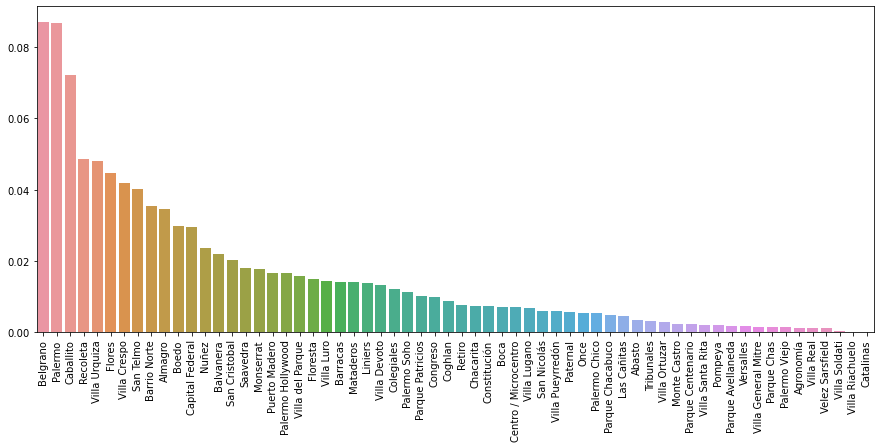

In [364]:
state_proportion = df['place_name'].value_counts() / df.shape[0]

plt.figure(figsize=(15,6))
ax = sns.barplot(x=state_proportion.index, y=state_proportion.values)
ax.tick_params(axis='x', rotation=90)


## Vamos a empezar viendo los datos agregadamente por columnas

### Superficies

In [365]:
sns.set_style('whitegrid')

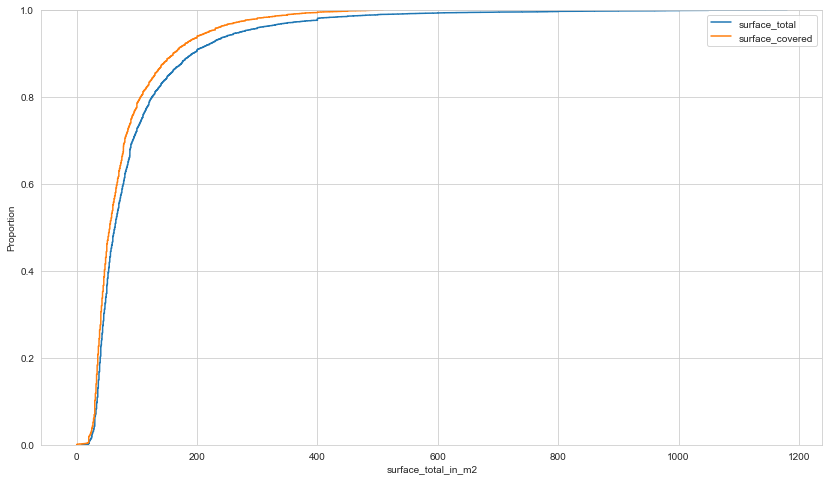

In [366]:
fig, ax = plt.subplots(figsize=(14,8))
sns.ecdfplot(data=df, x="surface_total_in_m2", ax=ax, label='surface_total')
sns.ecdfplot(data=df, x="surface_covered_in_m2", ax=ax, label='surface_covered')
plt.legend()


Podemos ver que la mayor parte de las propiedades consta de menos de 200m2. Y casi la totalidad, tanto en m2 cubiertos o totales se encuentra dentro de los 400m2

<AxesSubplot:xlabel='surface_covered_in_m2'>

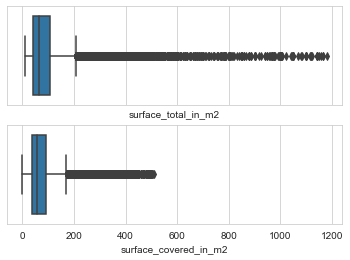

In [367]:
fig, ax = plt.subplots(2,1,sharex=True)
sns.boxplot(x=df.surface_total_in_m2, ax=ax[0])
sns.boxplot(x=df.surface_covered_in_m2, ax=ax[1])


### Precio

<AxesSubplot:xlabel='price_aprox_usd', ylabel='Count'>

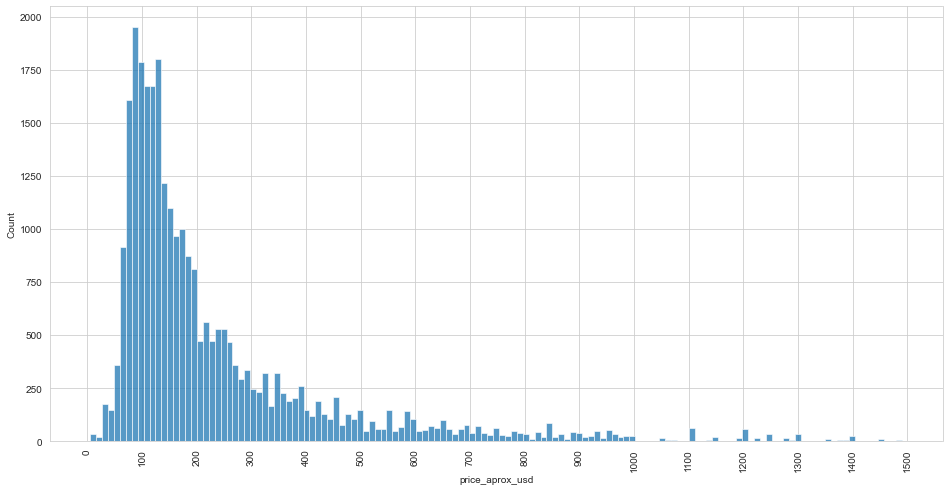

In [368]:
price = df.price_aprox_usd / 1000
plt.figure(figsize=(16,8))
plt.xticks(np.arange(0,3500,100))
plt.xticks(rotation = 90)
sns.histplot(data=price,)


Se puede ver claramente que los valores se concentran fuertemente hasta los 300.000 usd aproximadamente con cola hacia la dereha.

<AxesSubplot:xlabel='price_aprox_usd', ylabel='Proportion'>

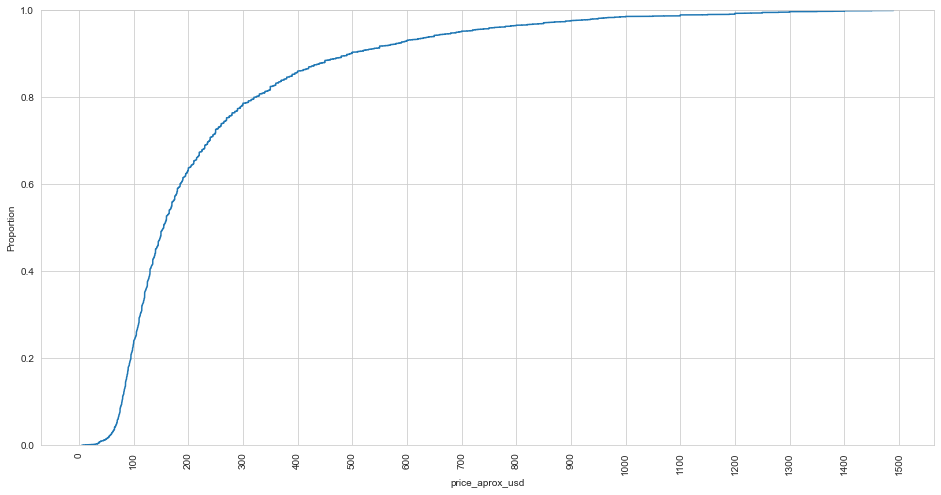

In [369]:
plt.figure(figsize=(16,8))
plt.xticks(np.arange(0,3600,100))
plt.xticks(rotation = 90)
sns.ecdfplot(data=price)

El 80% de los precios cae debajo de los 300.000 USD

#### Vamos a ver los boxplots por estados

c:\Users\Usuario\anaconda3\envs\geopandassb\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


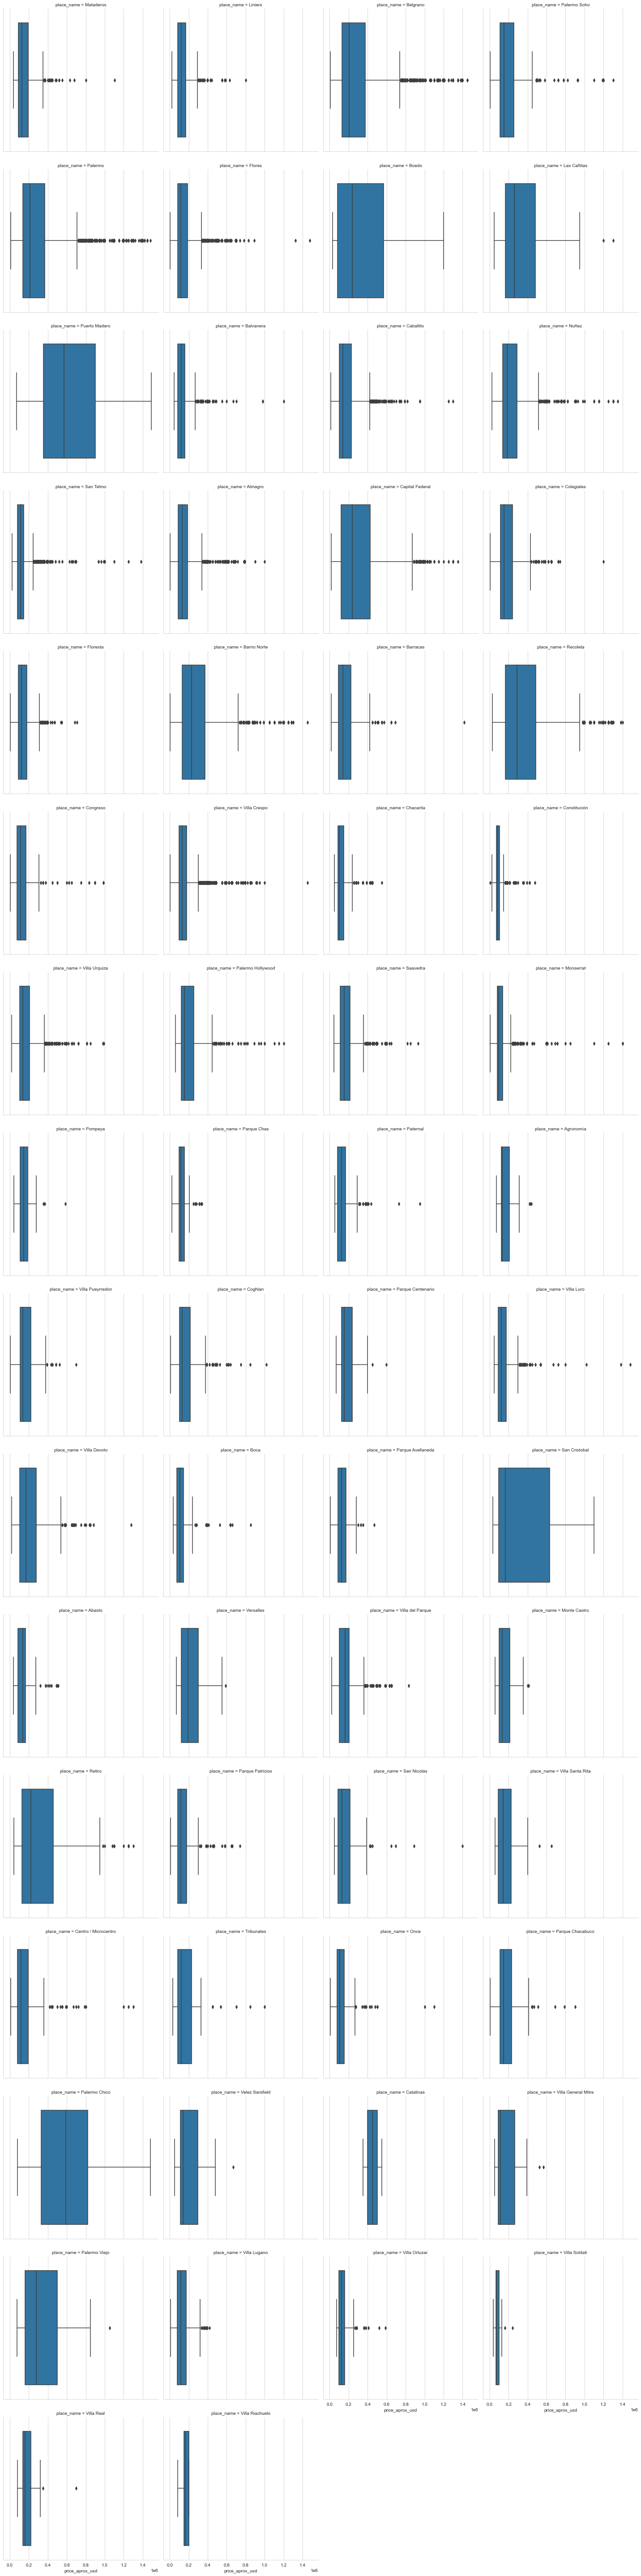

In [381]:
g = sns.FacetGrid(df, col='place_name',col_wrap=4, height=5,sharex=True)
g.map(sns.boxplot,'price_aprox_usd',)


Vamos a ver como es el precio promedio de las propiedades en cada barrio

<AxesSubplot:xlabel='place_name'>

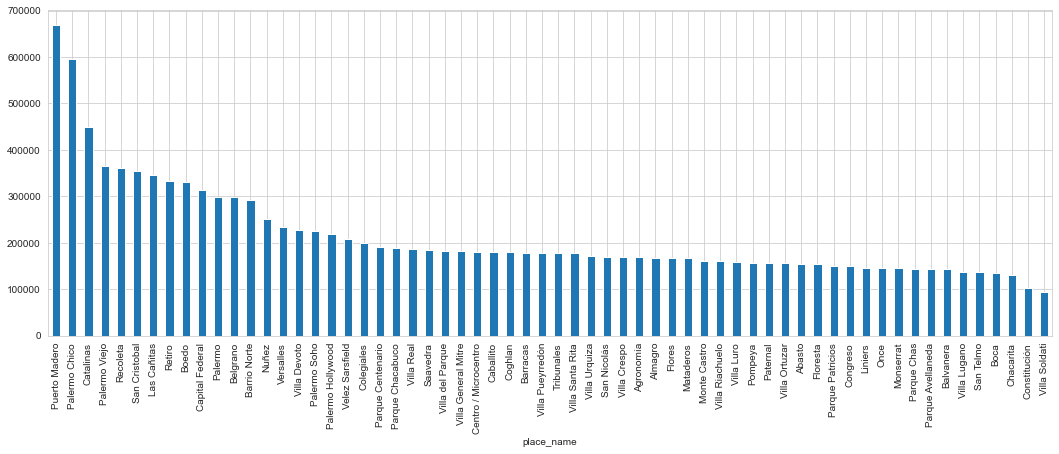

In [380]:
df.groupby('place_name')['price_aprox_usd'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(18,6),)


Nos encontramos con Zona norte y Capital Federal como los lugares que concentran el mayor promedio de precios

### Vamos a mirar un poquito mas adentro:

Densidad por tipo de propiedad:

<AxesSubplot:xlabel='price_aprox_usd', ylabel='Density'>

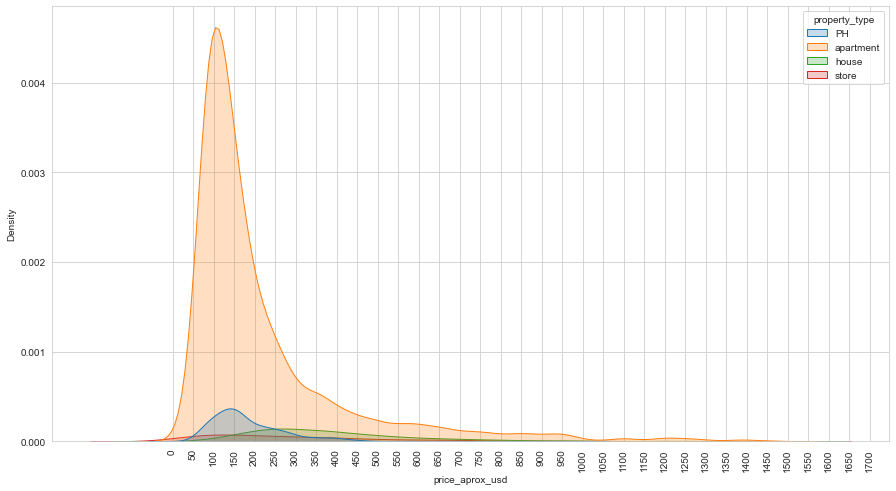

In [386]:
df_density = df.copy()
df_density.price_aprox_usd = df_density.price_aprox_usd / 1000 
plt.figure(figsize=(15, 8))
plt.xticks(np.arange(0,3600,50))
plt.xticks(rotation = 90)
sns.kdeplot(data = df_density, x = 'price_aprox_usd', hue='property_type', shade=True)

In [397]:
df

,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,garage,lavadero,balcon,parrilla,piscina,terraza,patio,jardin,sum,quincho,estrenar,min_subte,subtes_menor_500m,min_locales_bailables,locales_bailables_menor_500m,min_comisarias,comisarias_menor_500m,min_cuarteles
0,PH,Mataderos,Capital Federal,62000.0,55.000000,40.000000,2.000000,0,1,0,0,0,0,1,0,0,0,0,4728.393676,0.000000,1666.691008,0.000000,854.731083,0.000000,1338.362957
1,apartment,Mataderos,Capital Federal,72000.0,55.000000,55.000000,2.000000,0,1,0,0,0,0,0,0,0,0,0,6073.153602,0.000000,951.482447,0.000000,1329.365030,0.000000,1349.185580
2,PH,Liniers,Capital Federal,95000.0,120.857451,91.601224,3.000000,0,0,0,0,0,0,1,0,0,0,0,5305.630900,0.000000,536.546481,0.000000,1342.826496,0.000000,1342.048882
3,apartment,Belgrano,Capital Federal,138000.0,45.000000,40.000000,2.852152,0,1,0,0,1,0,0,0,0,0,1,609.743234,0.000000,552.466358,0.000000,305.293658,1.000000,1330.713856
4,apartment,Belgrano,Capital Federal,195000.0,65.000000,60.000000,2.852152,0,1,0,0,1,0,0,0,0,0,1,609.743234,0.000000,552.466358,0.000000,305.293658,1.000000,1330.713856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28394,apartment,Belgrano,Capital Federal,410000.0,157.000000,140.112501,2.852152,0,1,1,0,0,0,0,0,0,0,0,430.624480,1.000000,498.301841,1.000000,540.154238,0.000000,1113.380290
28395,apartment,Belgrano,Capital Federal,410000.0,157.000000,140.112501,2.852152,0,1,1,0,0,0,0,0,0,0,0,430.624480,1.000000,498.301841,1.000000,540.154238,0.000000,1113.380290
28396,apartment,Belgrano,Capital Federal,870000.0,113.000000,93.000000,2.000000,1,0,1,1,1,0,0,0,0,1,0,466.134341,0.608407,456.041680,0.782080,513.679193,0.501106,762.594984
28397,apartment,Villa Urquiza,Capital Federal,131500.0,46.000000,39.000000,2.509056,1,1,1,1,0,1,0,0,0,0,1,637.215519,0.000000,1569.942446,0.000000,146.700180,1.000000,1088.068227


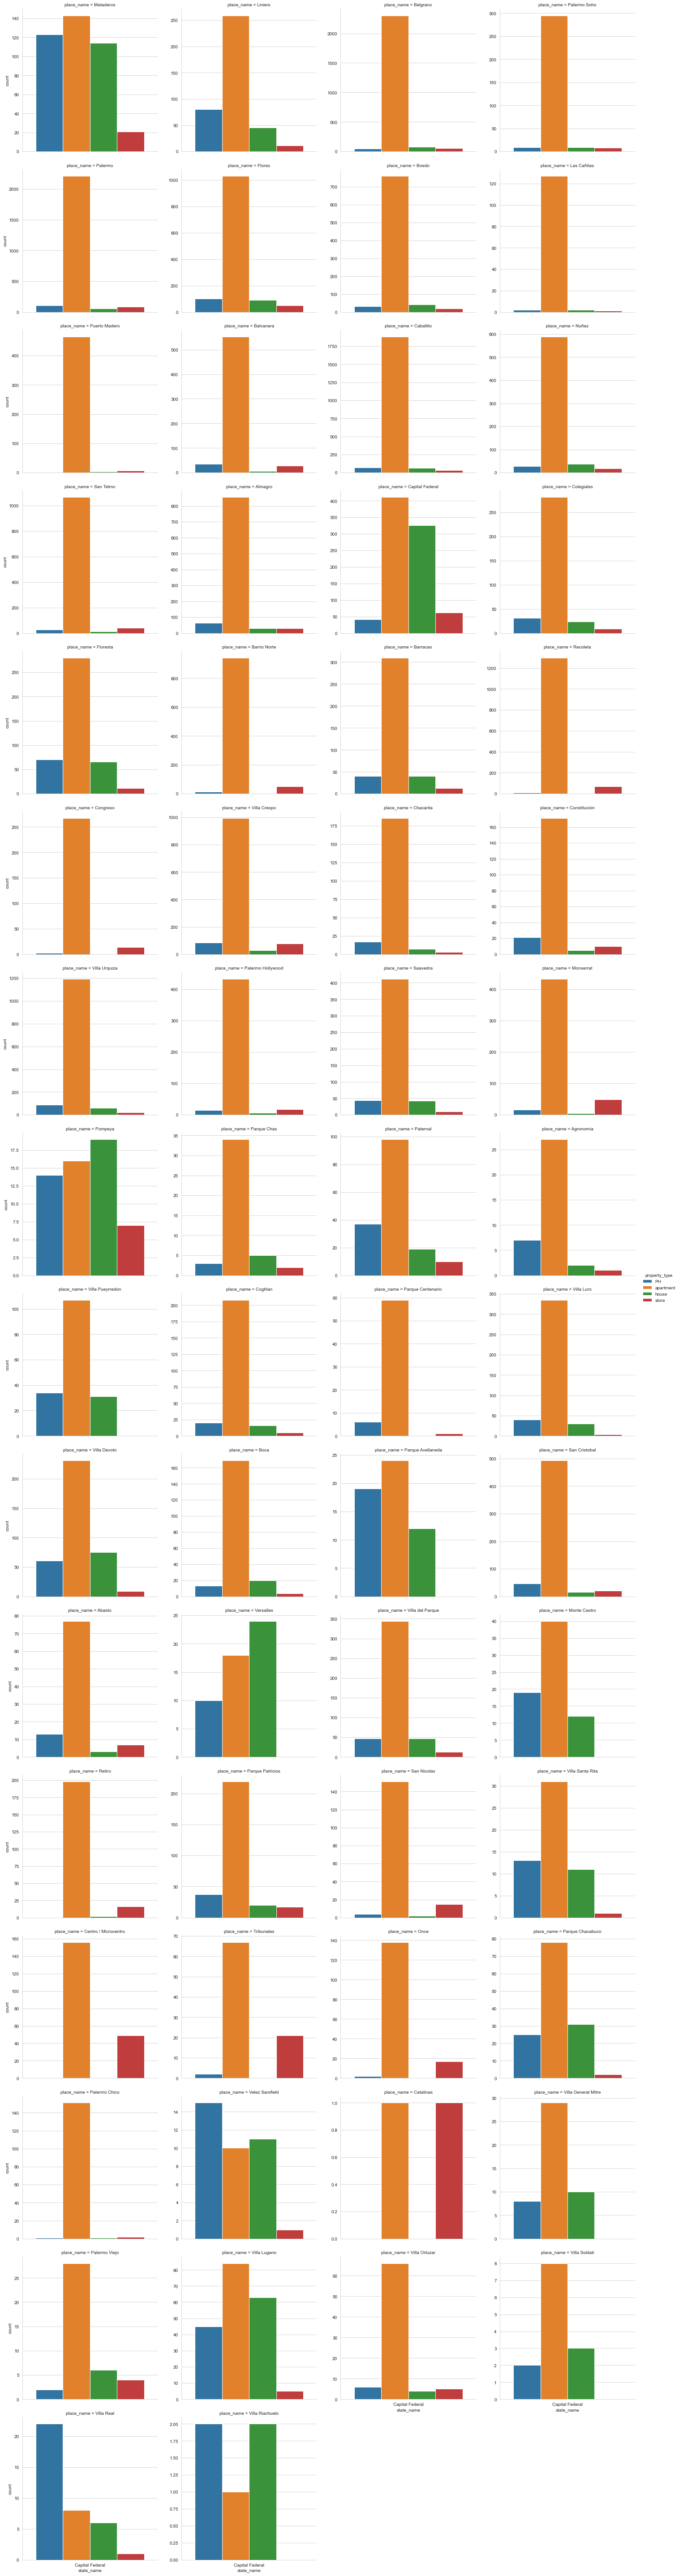

In [417]:
c = sns.catplot(data=df, col='place_name',kind='count',x='state_name',hue='property_type',col_wrap=4, height=5, sharey=False)
# c.add_legend()

Por lo que se ve Capital Federal aporta gran parte de los departamentos, siendo casi el unico tipo de propiedad que ofrece. Mientras que en zona norte, sur, y oeste la relación entre departamentos y casas se mantiene más pareja

### Veamos si hay alguna correlacion dentro de las variables que recolectamos en el DataFrame:

<AxesSubplot:>

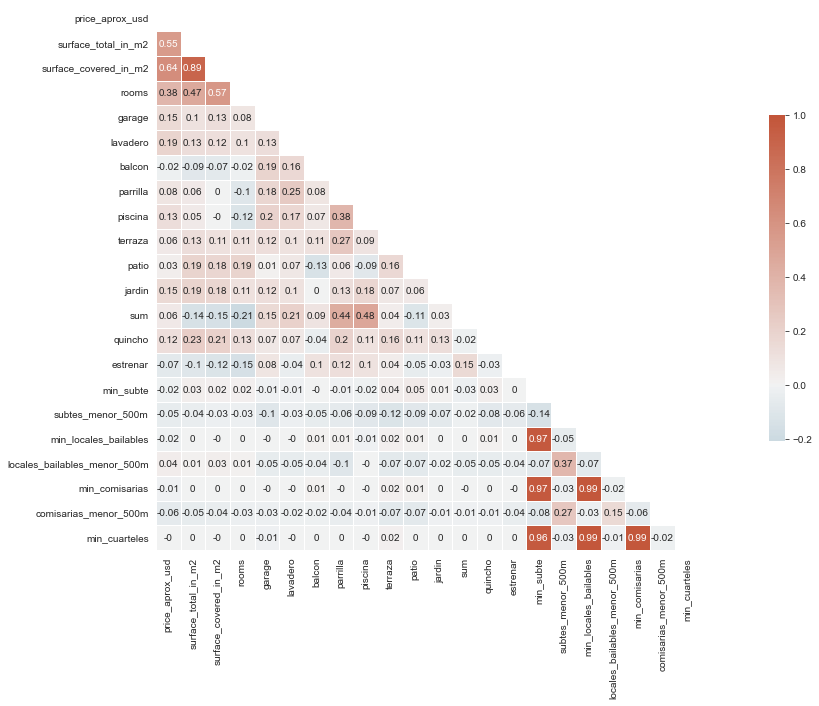

In [416]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(round(corr,2), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6},annot=True, ax=ax)
